In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols    # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.api as sm # FOR n-way ANOVA
from statsmodels.graphics.factorplots import interaction_plot

from statsmodels.stats.multicomp import MultiComparison # To compare the levels of independent variables with the dependent variables
from factor_analyzer import FactorAnalyzer

from scipy.stats import zscore
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from matplotlib.patches import Rectangle

import warnings 
warnings.filterwarnings( "ignore")
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('expected_ctc.csv')

### First 5 Observations

In [3]:
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


### Last 5 Observations

In [4]:
df.tail()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
24995,24996,25550,18,13,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,...,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,24997,53442,12,8,HR,Others,Analytics,B,Sr.Manager,Under Grad,...,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,24998,15777,22,8,Banking,Head,Insurance,D,Software Developer,Under Grad,...,Pune,Delhi,1681796,N,C,4,5,2,0,1934065
24998,24999,57616,25,8,Marketing,CEO,BFSI,D,Marketing Manager,PG,...,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638
24999,25000,20788,8,0,Banking,Consultant,Automobile,P,Sr.Manager,Grad,...,Surat,Mangalore,935897,N,A,2,6,0,0,1216666


### Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

**Interpretations :**
- There are total 25000 entries in the dataset.
- In the dataset, there are 29 columns.
- Many columns have null values present in them. They are as follows : 
        a. Department
        b. Role
        c. Industry
        d. Organization
        e. Designation
        f. Graduation_Specialization
        g. University_Grad
        h. Passing_Year_Of_Graduation
        i.PG_Specialization
        j. University_PG
        K. Passing_Year_Of_PG
        L. PHD_Specialization
        M. University_PHD
        N. Passing_Year_Of_PHD
        O. Last_Appraisal_Rating
        

### Data Descriptive Statistics

In [6]:
df.dtypes

IDX                                    int64
Applicant_ID                           int64
Total_Experience                       int64
Total_Experience_in_field_applied      int64
Department                            object
Role                                  object
Industry                              object
Organization                          object
Designation                           object
Education                             object
Graduation_Specialization             object
University_Grad                       object
Passing_Year_Of_Graduation           float64
PG_Specialization                     object
University_PG                         object
Passing_Year_Of_PG                   float64
PHD_Specialization                    object
University_PHD                        object
Passing_Year_Of_PHD                  float64
Curent_Location                       object
Preferred_location                    object
Current_CTC                            int64
Inhand_Off

### Data Shape

In [7]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  25000 
no. of columns:  29


### Checking For Null Values

In [8]:
df.isnull().sum()

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

**Interpretations:**
- Thus, many null values are present in various columns.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


**Interpretations :**
- By comparing mean and meadian(50%) from the describe function, we got to know that most of the columns are very close to normal distribution . Very slight difference is there in the values of mean and median which put each of the variable into left skewed and right skewed distribution.
- __International_degree_any__ had maximum skewness followed by __Certifications__ which had 2nd highest skewness in the dataset.

### Skewness

In [10]:
df.skew()

IDX                                  0.000000
Applicant_ID                         0.003409
Total_Experience                     0.004109
Total_Experience_in_field_applied    0.961951
Passing_Year_Of_Graduation           0.061408
Passing_Year_Of_PG                  -0.066166
Passing_Year_Of_PHD                  0.014436
Current_CTC                          0.097643
No_Of_Companies_worked              -0.068026
Number_of_Publications              -0.075217
Certifications                       1.610907
International_degree_any             3.054017
Expected_CTC                         0.331972
dtype: float64

### Making different list for categorical columns and numerical columns

In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education', 'Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD', 'Curent_Location', 'Preferred_location', 'Inhand_Offer', 'Last_Appraisal_Rating']
['IDX', 'Applicant_ID', 'Total_Experience', 'Total_Experience_in_field_applied', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD', 'Current_CTC', 'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications', 'International_degree_any', 'Expected_CTC']


### Checking For Anomilies/Bad Data

In [12]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Department : 0
Role : 0
Industry : 0
Organization : 0
Designation : 0
Education : 0
Graduation_Specialization : 0
University_Grad : 0
PG_Specialization : 0
University_PG : 0
PHD_Specialization : 0
University_PHD : 0
Curent_Location : 0
Preferred_location : 0
Inhand_Offer : 0
Last_Appraisal_Rating : 0


In [13]:
for variable in cat:
    print(variable,":", sum(df[variable] == '$'))

Department : 0
Role : 0
Industry : 0
Organization : 0
Designation : 0
Education : 0
Graduation_Specialization : 0
University_Grad : 0
PG_Specialization : 0
University_PG : 0
PHD_Specialization : 0
University_PHD : 0
Curent_Location : 0
Preferred_location : 0
Inhand_Offer : 0
Last_Appraisal_Rating : 0


In [14]:
for variable in num:
    print(variable,":", sum(df[variable] == '?'))

IDX : 0
Applicant_ID : 0
Total_Experience : 0
Total_Experience_in_field_applied : 0
Passing_Year_Of_Graduation : 0
Passing_Year_Of_PG : 0
Passing_Year_Of_PHD : 0
Current_CTC : 0
No_Of_Companies_worked : 0
Number_of_Publications : 0
Certifications : 0
International_degree_any : 0
Expected_CTC : 0


In [15]:
for variable in num:
    print(variable,":", sum(df[variable] == '$'))

IDX : 0
Applicant_ID : 0
Total_Experience : 0
Total_Experience_in_field_applied : 0
Passing_Year_Of_Graduation : 0
Passing_Year_Of_PG : 0
Passing_Year_Of_PHD : 0
Current_CTC : 0
No_Of_Companies_worked : 0
Number_of_Publications : 0
Certifications : 0
International_degree_any : 0
Expected_CTC : 0


**Interpretation :**
- No external variables was present in the categorical & numerical dataset.
- Hence as per the above code, there were no anomilies(such as __'?'__ or __'$'__) present in the data set.

### Data Preprocessing

#### Descriptive Statistics

In [16]:
# For Numerical Data
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
IDX,25000.0,1.250050e+04,7.217023e+03,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,3.499324e+04,1.439027e+04,10000.0,22563.75,34974.5,47419.00,60000.0
Total_Experience,25000.0,1.249308e+01,7.471398e+00,0.0,6.00,12.0,19.00,25.0
Total_Experience_in_field_applied,25000.0,6.258200e+00,5.819513e+00,0.0,1.00,5.0,10.00,25.0
Passing_Year_Of_Graduation,18820.0,2.002194e+03,8.316640e+00,1986.0,1996.00,2002.0,2009.00,2020.0
Passing_Year_Of_PG,17308.0,2.005154e+03,9.022963e+00,1988.0,1997.00,2006.0,2012.00,2023.0
Passing_Year_Of_PHD,13119.0,2.007396e+03,7.493601e+00,1995.0,2001.00,2007.0,2014.00,2020.0
Current_CTC,25000.0,1.760945e+06,9.202125e+05,0.0,1027311.50,1802567.5,2443883.25,3999693.0
No_Of_Companies_worked,25000.0,3.482040e+00,1.690335e+00,0.0,2.00,3.0,5.00,6.0
Number_of_Publications,25000.0,4.089040e+00,2.606612e+00,0.0,2.00,4.0,6.00,8.0


In [17]:
# For Categorical Data
df[cat].describe().T

,count,unique,top,freq
Department,22222,12,Marketing,2379
Role,24037,24,Others,2248
Industry,24092,11,Training,2237
Organization,24092,16,M,1574
Designation,21871,18,HR,1648
Education,25000,4,PG,6326
Graduation_Specialization,18820,11,Chemistry,1785
University_Grad,18820,13,Bhubaneswar,1510
PG_Specialization,17308,11,Mathematics,1800
University_PG,17308,13,Bhubaneswar,1377


#### Check For Duplicate Data

In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC


**Conclusion**
- Hence as per the above code, no duplicate values are present in the dataset.

### Unique Values for Categorical Variables

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

DEPARTMENT :  12
IT-Software       1078
Accounts          1118
Top Management    1632
Engineering       1937
Education         1948
Banking           1952
HR                1988
Sales             1991
Others            2041
Healthcare        2062
Analytics/BI      2096
Marketing         2379
Name: Department, dtype: int64


ROLE :  24
Lab Executuve             25
Professor                 33
Research Scientist        33
Sr. Business Analyst     114
Researcher               123
Senior Analyst           128
Area Sales Manager       134
Principal Analyst        275
Data scientist           363
Associate                767
Head                    1108
Scientist               1139
CEO                     1149
Financial Analyst       1182
Senior Researcher       1236
Sales Manager           1427
Sales Execituve         1574
Business Analyst        1711
Consultant              1780
Team Lead               1833
Project Manager         1850
Analyst                 1892
Bio statistician        1

### Creating Duplicate Dataset

In [20]:
data = df.copy()

In [21]:
# we will drop the un-necessary columns from the table as we have already done checking for duplicates and anomilies

In [22]:
data.drop(['IDX'], axis =1,inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Applicant_ID                       25000 non-null  int64  
 1   Total_Experience                   25000 non-null  int64  
 2   Total_Experience_in_field_applied  25000 non-null  int64  
 3   Department                         22222 non-null  object 
 4   Role                               24037 non-null  object 
 5   Industry                           24092 non-null  object 
 6   Organization                       24092 non-null  object 
 7   Designation                        21871 non-null  object 
 8   Education                          25000 non-null  object 
 9   Graduation_Specialization          18820 non-null  object 
 10  University_Grad                    18820 non-null  object 
 11  Passing_Year_Of_Graduation         18820 non-null  flo

**Interpretation :**
- It is inferred that __'IDX'__ column had been dropped successfully.

### Anova Test fro checking significance of variables with missing values

$\textbf{Analysis of variance (ANOVA)}$ is an analysis tool used in statistics that splits an observed aggregate variability found inside a data set into two parts: systematic factors and random factors. The systematic factors have a statistical influence on the given data set, while the random factors do not.
ANOVA test to determine the influence that independent variables have on the dependent variable in a regression study.

In [24]:
#converting the object data type into categorical datatype before performing ANOVA test
data['Department'] = pd.Categorical(data['Department'])
data['Role'] = pd.Categorical(data['Role'])
data['Industry'] = pd.Categorical(data['Industry'])
data['Organization'] = pd.Categorical(data['Organization'])
data['Designation'] = pd.Categorical(data['Designation'])
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Applicant_ID                       25000 non-null  int64   
 1   Total_Experience                   25000 non-null  int64   
 2   Total_Experience_in_field_applied  25000 non-null  int64   
 3   Department                         22222 non-null  category
 4   Role                               24037 non-null  category
 5   Industry                           24092 non-null  category
 6   Organization                       24092 non-null  category
 7   Designation                        21871 non-null  category
 8   Education                          25000 non-null  object  
 9   Graduation_Specialization          18820 non-null  object  
 10  University_Grad                    18820 non-null  object  
 11  Passing_Year_Of_Graduation         18820 

**Interpretation :**
- It is inferred that variables mentioned had been converted into categerical variables.

<span style="font-family: Arial; font-weight : bold; font-size:1.5em;"> a) Variable : 'Department' - 

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Department' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Department' for the various categories of education are unequal.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> b) Variable :'Role'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Role' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Role' are unequal.


    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> c) Variable :'Industry'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Industry' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Industry' are unequal.

    
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> d) Variable :'Organization'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Organization' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Organization' are unequal.
   
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> e) Variable :'Designation'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Designation' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Designation' are unequal.
    

By default, level of significance is not mentioned, thus we are assuming level of significance = 0.05 by default.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Level of significance:

$\alpha$ = 0.05 

In [25]:
mod_depart = ols('Expected_CTC ~ Department', data = data).fit()
aov_tbl_depart = sm.stats.anova_lm(mod_depart)
print(aov_tbl_depart)

                 df        sum_sq       mean_sq          F         PR(>F)
Department     11.0  6.337191e+14  5.761083e+13  45.797466  7.593981e-100
Residual    22210.0  2.793902e+16  1.257948e+12        NaN            NaN


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Department'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

In [26]:
mod_role = ols('Expected_CTC ~ Role', data = data).fit()
aov_tbl_role = sm.stats.anova_lm(mod_role)
print(aov_tbl_role)

               df        sum_sq       mean_sq           F  PR(>F)
Role         23.0  2.757403e+15  1.198871e+14  102.453571     0.0
Residual  24013.0  2.809906e+16  1.170160e+12         NaN     NaN


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Role'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

In [27]:
mod_indus = ols('Expected_CTC ~ Industry', data = data).fit()
aov_tbl_indus = sm.stats.anova_lm(mod_indus)
print(aov_tbl_indus)

               df        sum_sq       mean_sq         F    PR(>F)
Industry     10.0  1.779303e+13  1.779303e+12  1.383881  0.180551
Residual  24081.0  3.096177e+16  1.285734e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'Industry'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [28]:
mod_organ = ols('Expected_CTC ~ Organization', data = data).fit()
aov_tbl_organ = sm.stats.anova_lm(mod_organ)
print(aov_tbl_organ)

                   df        sum_sq       mean_sq         F    PR(>F)
Organization     15.0  2.266287e+13  1.510858e+12  1.175034  0.282958
Residual      24076.0  3.095690e+16  1.285799e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'Organization'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [29]:
mod_design = ols('Expected_CTC ~ Designation', data = data).fit()
aov_tbl_design = sm.stats.anova_lm(mod_design)
print(aov_tbl_design)

                  df        sum_sq       mean_sq          F        PR(>F)
Designation     17.0  2.291481e+14  1.347930e+13  10.614372  3.215570e-29
Residual     21853.0  2.775135e+16  1.269910e+12        NaN           NaN


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Designation'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

$\textbf{Conclusion:}$
- As per the ANOVA results, the variables which are found to be in significant are - __'Department'__ , __'Role'__ , __'Designation'__.
- We also inferred that , the categorical variables which are found to be significant are - __'Industry'__ & __'Organization'__ .
- As a result, the insignifcant variables are not needed in the model building and thus they needed to be dropped from the table.

In [30]:
data.drop(['Department','Role','Designation'], axis=1, inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Applicant_ID                       25000 non-null  int64   
 1   Total_Experience                   25000 non-null  int64   
 2   Total_Experience_in_field_applied  25000 non-null  int64   
 3   Industry                           24092 non-null  category
 4   Organization                       24092 non-null  category
 5   Education                          25000 non-null  object  
 6   Graduation_Specialization          18820 non-null  object  
 7   University_Grad                    18820 non-null  object  
 8   Passing_Year_Of_Graduation         18820 non-null  float64 
 9   PG_Specialization                  17308 non-null  object  
 10  University_PG                      17308 non-null  object  
 11  Passing_Year_Of_PG                 17308 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> a) Variable :'Graduation_Specialization'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Graduation_Specialization' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Graduation_Specialization' are unequal.

    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> )b Variable :'University_Grad'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'University_Grad' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'University_Grad' are unequal.

    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> c) Variable :'PG_Specialization'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'PG_Specialization' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'PG_Specialization' are unequal.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> d) Variable :'University_PG'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'University_PG' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'University_PG' are unequal.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> e) Variable :'PHD_Specialization'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'PHD_Specialization' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'PHD_Specialization' are unequal.

    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> f) Variable :'University_PHD'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'University_PHD' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'University_PHD' are unequal.


By default, level of significance is not mentioned, thus we are assuming level of significance = 0.05 by default.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Level of significance:

$\alpha$ = 0.05 

In [32]:
mod_grad_spec = ols('Expected_CTC ~ Graduation_Specialization', data = data).fit()
aov_tbl_grad_spec = sm.stats.anova_lm(mod_grad_spec)
print(aov_tbl_grad_spec)

                                df        sum_sq       mean_sq         F  \
Graduation_Specialization     10.0  9.437514e+12  9.437514e+11  0.671034   
Residual                   18809.0  2.645323e+16  1.406414e+12       NaN   

                             PR(>F)  
Graduation_Specialization  0.752457  
Residual                        NaN  


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'Graduation_Specialization'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [33]:
mod_univ_grad = ols('Expected_CTC ~ University_Grad', data = data).fit()
aov_tbl_univ_grad = sm.stats.anova_lm(mod_univ_grad)
print(aov_tbl_univ_grad)

                      df        sum_sq       mean_sq         F    PR(>F)
University_Grad     12.0  1.020269e+13  8.502242e+11  0.604487  0.840356
Residual         18807.0  2.645247e+16  1.406522e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'University_Grad'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [34]:
mod_pg_spec = ols('Expected_CTC ~ PG_Specialization', data = data).fit()
aov_tbl_pg_spec = sm.stats.anova_lm(mod_pg_spec)
print(aov_tbl_pg_spec)

                        df        sum_sq       mean_sq         F    PR(>F)
PG_Specialization     10.0  1.237396e+13  1.237396e+12  0.883616  0.547741
Residual           17297.0  2.422234e+16  1.400378e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'PG_Specialization'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [35]:
mod_univ_pg = ols('Expected_CTC ~ University_PG', data = data).fit()
aov_tbl_univ_pg = sm.stats.anova_lm(mod_univ_pg)
print(aov_tbl_univ_pg)

                    df        sum_sq       mean_sq        F   PR(>F)
University_PG     12.0  9.550720e+12  7.958934e+11  0.56821  0.86933
Residual       17295.0  2.422517e+16  1.400704e+12      NaN      NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'University_PG'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [36]:
mod_phd_spec = ols('Expected_CTC ~ PHD_Specialization', data = data).fit()
aov_tbl_phd_spec = sm.stats.anova_lm(mod_phd_spec)
print(aov_tbl_phd_spec)

                         df        sum_sq       mean_sq         F    PR(>F)
PHD_Specialization     10.0  2.093442e+13  2.093442e+12  1.501675  0.131598
Residual            13108.0  1.827348e+16  1.394071e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'PHD_Specialization'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [37]:
mod_univ_phd = ols('Expected_CTC ~ University_PHD', data = data).fit()
aov_tbl_univ_phd = sm.stats.anova_lm(mod_univ_phd)
print(aov_tbl_univ_phd)

                     df        sum_sq       mean_sq         F    PR(>F)
University_PHD     12.0  8.209932e+12  6.841610e+11  0.490348  0.921763
Residual        13106.0  1.828621e+16  1.395255e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'University_PHD'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

**NOTE :** 
- All three variables namely - __'Passing_Year_Of_Graduation'__ , __'Passing_Year_Of_PG'__ , __'Passing_Year_Of_PHD'__ are time stamps & are discrete values. Thus, they can be considered as categorical variables also.
- As a result , we would do ANOVA Test to them as well to consider every possibility.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> a) Variable :'Passing_Year_Of_Graduation'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Passing_Year_Of_Graduation' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Passing_Year_Of_Graduation' are unequal.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> b) Variable :'Passing_Year_Of_PG'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Passing_Year_Of_PG' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Passing_Year_Of_PG' are unequal.


    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> c ) Variable :'Passing_Year_Of_PHD'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Passing_Year_Of_PHD' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Passing_Year_Of_PHD' are unequal.



By default, level of significance is not mentioned, thus we are assuming level of significance = 0.05 by default.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Level of significance:

$\alpha$ = 0.05 

In [38]:
mod_pass_grad = ols('Expected_CTC ~ Passing_Year_Of_Graduation', data = data).fit()
aov_tbl_pass_grad = sm.stats.anova_lm(mod_pass_grad)
print(aov_tbl_pass_grad)

                                 df        sum_sq       mean_sq            F  \
Passing_Year_Of_Graduation      1.0  1.523237e+16  1.523237e+16  25524.03077   
Residual                    18818.0  1.123030e+16  5.967853e+11          NaN   

                            PR(>F)  
Passing_Year_Of_Graduation     0.0  
Residual                       NaN  


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Passing_Year_Of_Graduation'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

In [39]:
mod_pass_pg = ols('Expected_CTC ~ Passing_Year_Of_PG', data = data).fit()
aov_tbl_pass_pg = sm.stats.anova_lm(mod_pass_pg)
print(aov_tbl_pass_pg)

                         df        sum_sq       mean_sq            F  PR(>F)
Passing_Year_Of_PG      1.0  6.832329e+15  6.832329e+15  6794.485272     0.0
Residual            17306.0  1.740239e+16  1.005570e+12          NaN     NaN


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Passing_Year_Of_PG'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

In [40]:
mod_pass_phd = ols('Expected_CTC ~ Passing_Year_Of_PHD', data = data).fit()
aov_tbl_pass_phd = sm.stats.anova_lm(mod_pass_phd)
print(aov_tbl_pass_phd)

                          df        sum_sq       mean_sq             F  PR(>F)
Passing_Year_Of_PHD      1.0  1.273155e+16  1.273155e+16  30020.475267     0.0
Residual             13117.0  5.562863e+15  4.240957e+11           NaN     NaN


$\textbf{Interpretation:}$ The P-value obtained from ANOVA analysis for __'Passing_Year_Of_PHD'__ is less than $\alpha$ (0.05). Thus, we $\textbf{Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$), <br> since P-value < Level of significance __(P_Value < 0.05)__ .

$\textbf{Conclusion:}$
- As per the ANOVA test, the variables __'Graduation_Specialization'__, __'University_Grad'__, __'PG_Specialization'__ , __'University_PG'__ , __'PHD_Specialization'__ & __'University_PHD'__ were found to be significant and thus they shall not be dropped.
- But as per the ANOVA results for other variables that is the variables which are found to be insignificant are - __'Passing_Year_Of_Graduation'__ , __'Passing_Year_Of_PG'__ , __'Passing_Year_Of_PHD'__.
- We know that __'Graduation_Specialization'__ & __'University_Grad'__ are correlated to __'Passing_Year_Of Graduation'__ and same for __'PG_Specialization'__ & __'PHD_Specialization'__. So, as __'Passing_Year_Of_Grad'__ , __'Passing_Year_Of_PG'__ & __'Passing_Year_Of_PHD'__ were found to be insignificant that means there correlated variables must also become irrelevant for model building. <br>
- As a result, the insignifcant variables are not needed in the model building and thus they needed to be dropped from the table.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> a) Variable :'Curent_Location'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Curent_Location' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Curent_Location' are unequal.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> b) Variable :'Preferred_location'  -

$H_0$: $\mu_{M1}$ = $\mu_{M2}$ = $\mu_{M3}$

$H_0$: Mean 'Preferred_location' for an for all the Employees/Individuals are equal.

$H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ = $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M2}$ $\neq$ $\mu_{M3}$ or $H_1$: $\mu_{M1}$ = $\mu_{M3}$ $\neq$ $\mu_{M2}$ or $H_1$: $\mu_{M1}$ $\neq$ $\mu_{M2}$ $\neq$ $\mu_{M3}$

$H_1$: At least one of the mean 'Preferred_location' are unequal.


In [41]:
mod_current_loc = ols('Expected_CTC ~ Curent_Location', data = data).fit()
aov_tbl_current_loc = sm.stats.anova_lm(mod_current_loc)
print(aov_tbl_current_loc)

                      df        sum_sq       mean_sq         F    PR(>F)
Curent_Location     14.0  1.470852e+13  1.050609e+12  0.780031  0.692256
Residual         24985.0  3.365180e+16  1.346880e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'Curent_Location'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

In [42]:
mod_pref_loc = ols('Expected_CTC ~ Preferred_location', data = data).fit()
aov_tbl_pref_loc = sm.stats.anova_lm(mod_pref_loc)
print(aov_tbl_pref_loc)

                         df        sum_sq       mean_sq         F    PR(>F)
Preferred_location     14.0  1.546245e+13  1.104461e+12  0.820033  0.647939
Residual            24985.0  3.365105e+16  1.346850e+12       NaN       NaN


$\textbf{Interpretation:}$ The p_value obtained from ANOVA analysis for __'Preferred_location'__ is greater than $\alpha$ (0.05). Thus, we $\textbf{Fail to Reject}$ the $\textbf{Null Hypothesis}$ ($H_0$) since p_value > Level of significance __(P_Value > 0.05)__ .

$\textbf{Conclusion:}$
- As per the ANOVA test, the variables __'Curent_Location'__ & __'Preferred_location'__ were found to be significant and thus they shall not be dropped.
- We will group them so as to make work easy and efficient.

### Label Encoding 

**Transforming Data**

In order to proceed to linear regression, all the columns must be in numerical format, thus all the necessary categorical data (__'Education'__ in this case)must be changed into numerical data type.

In [43]:
data['Education'].unique()

array(['PG', 'Doctorate', 'Grad', 'Under Grad'], dtype=object)

In [44]:
data["Education"]=data["Education"].replace({"Under Grad":0,"Grad":1,"PG":2,"Doctorate":3})

In [45]:
data['Education'].unique()

array([2, 3, 1, 0], dtype=int64)

**Interpretation :**
- The __'Education'__ variable had been transformed into numerical(int) successfully and also assigned the number according to the priority wise.

In [46]:
data.head()

,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,22753,0,0,NaN,NaN,2,Arts,Lucknow,2020.0,NaN,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,51087,23,14,Analytics,H,3,Chemistry,Surat,1988.0,Others,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,38413,21,12,Training,J,3,Zoology,Jaipur,1990.0,Zoology,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,11501,15,8,Aviation,F,3,Others,Bangalore,1997.0,Zoology,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,58941,10,5,Insurance,E,1,Zoology,Mumbai,2004.0,Zoology,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


### Dropping all the Insignificant Variables

In [47]:
data.drop(['Graduation_Specialization', 'University_Grad', 'PG_Specialization','University_PG', 'PHD_Specialization', 'University_PHD', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD'], axis=1, inplace = True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Applicant_ID                       25000 non-null  int64   
 1   Total_Experience                   25000 non-null  int64   
 2   Total_Experience_in_field_applied  25000 non-null  int64   
 3   Industry                           24092 non-null  category
 4   Organization                       24092 non-null  category
 5   Education                          25000 non-null  int64   
 6   Curent_Location                    25000 non-null  object  
 7   Preferred_location                 25000 non-null  object  
 8   Current_CTC                        25000 non-null  int64   
 9   Inhand_Offer                       25000 non-null  object  
 10  Last_Appraisal_Rating              24092 non-null  object  
 11  No_Of_Companies_worked             25000 

__Conclusion :__
- All the insignificant variables had been dropped out successfully.
- Now, we will proceed to further make changes whereever necessary for model building.

#### Imputing Values IN Last_Appraisal_Rating

In [49]:
data['Last_Appraisal_Rating'] = data['Last_Appraisal_Rating'].fillna(data['Last_Appraisal_Rating'].mode()[0])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Applicant_ID                       25000 non-null  int64   
 1   Total_Experience                   25000 non-null  int64   
 2   Total_Experience_in_field_applied  25000 non-null  int64   
 3   Industry                           24092 non-null  category
 4   Organization                       24092 non-null  category
 5   Education                          25000 non-null  int64   
 6   Curent_Location                    25000 non-null  object  
 7   Preferred_location                 25000 non-null  object  
 8   Current_CTC                        25000 non-null  int64   
 9   Inhand_Offer                       25000 non-null  object  
 10  Last_Appraisal_Rating              25000 non-null  object  
 11  No_Of_Companies_worked             25000 

**Interpretation :**
- We have successfully imputed the values in __'Last_Appraisal_Rating'__ using mode.

### Ordinal Encoding

In [51]:
data['Last_Appraisal_Rating'].unique()

array(['B', 'Key_Performer', 'C', 'A', 'D'], dtype=object)

In [52]:
data["Last_Appraisal_Rating"]=data["Last_Appraisal_Rating"].replace({"D":0,"C":1,"B":2,"A":3,"Key_Performer":4})

In [53]:
data['Last_Appraisal_Rating'].unique()

array([2, 4, 1, 3, 0], dtype=int64)

**Interpretation :**
- We had successfully done ordinal encoding.

### Grouping Current_Location & Preferred_Location

We are making 4 different groups for both __'Curent_Location'__ & __'Preferred_location'__, so that it would be easy and convinient for model building.

In [54]:
data['Curent_Location'].unique()

array(['Guwahati', 'Bangalore', 'Ahmedabad', 'Kanpur', 'Pune', 'Delhi',
       'Surat', 'Nagpur', 'Jaipur', 'Kolkata', 'Bhubaneswar', 'Mangalore',
       'Mumbai', 'Lucknow', 'Chennai'], dtype=object)

In [55]:
data["Curent_Location"]=data["Curent_Location"].replace({"Bangalore":'Tier_1',"Guwahati":'Tier_3',
                                                        'Ahmedabad':'Tier_1','Kanpur':'Tier_2',
                                                        'Pune':'Tier_1','Delhi':'Tier_1',
                                                        'Surat':'Tier_2','Nagpur':'Tier_3',
                                                         'Jaipur':'Tier_2','Kolkata':'Tier_1',
                                                        'Bhubaneswar':'Tier_3','Mangalore':'Tier_3',
                                                        'Mumbai':'Tier_1','Lucknow':'Tier_2','Chennai':'Tier_1'})
data.head()

,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,22753,0,0,NaN,NaN,2,Tier_3,Pune,0,N,2,0,0,0,0,384551
1,51087,23,14,Analytics,H,3,Tier_1,Nagpur,2702664,Y,4,2,4,0,0,3783729
2,38413,21,12,Training,J,3,Tier_1,Jaipur,2236661,Y,4,5,3,0,0,3131325
3,11501,15,8,Aviation,F,3,Tier_2,Kolkata,2100510,N,1,5,3,0,0,2608833
4,58941,10,5,Insurance,E,1,Tier_1,Ahmedabad,1931644,N,1,2,3,0,0,2221390


In [56]:
data["Preferred_location"]=data["Preferred_location"].replace({"Bangalore":'Tier_1',"Guwahati":'Tier_3',
                                                        'Ahmedabad':'Tier_1','Kanpur':'Tier_2',
                                                        'Pune':'Tier_1','Delhi':'Tier_1',
                                                        'Surat':'Tier_2','Nagpur':'Tier_3',
                                                         'Jaipur':'Tier_2','Kolkata':'Tier_1',
                                                        'Bhubaneswar':'Tier_3','Mangalore':'Tier_3',
                                                        'Mumbai':'Tier_1','Lucknow':'Tier_2','Chennai':'Tier_1'})
data.head()

,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,22753,0,0,NaN,NaN,2,Tier_3,Tier_1,0,N,2,0,0,0,0,384551
1,51087,23,14,Analytics,H,3,Tier_1,Tier_3,2702664,Y,4,2,4,0,0,3783729
2,38413,21,12,Training,J,3,Tier_1,Tier_2,2236661,Y,4,5,3,0,0,3131325
3,11501,15,8,Aviation,F,3,Tier_2,Tier_1,2100510,N,1,5,3,0,0,2608833
4,58941,10,5,Insurance,E,1,Tier_1,Tier_1,1931644,N,1,2,3,0,0,2221390


In [57]:
data['Curent_Location'].value_counts(ascending =True)

Tier_2     6596
Tier_3     6736
Tier_1    11668
Name: Curent_Location, dtype: int64

In [58]:
data['Preferred_location'].value_counts(ascending =True)

Tier_2     6684
Tier_3     6692
Tier_1    11624
Name: Preferred_location, dtype: int64

### Label Encoding for 'Inhand_Offer'

In [59]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Inhand_Offer'])
 
# printing label
label

array([0, 1, 1, ..., 0, 1, 0])

In [60]:
# removing the column 'Inhand_Offer' from data as it is of no use now.
data.drop("Inhand_Offer", axis=1, inplace=True)
 
# Appending the array to our dataFrame with column name 'Inhand_Offer'
data["Inhand_Offer"] = label
 
# printing Dataframe
data

#For 'Inhand_Offer', after Label Encoding 'N' represents '0' & 'Y' represents '1'.

,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Curent_Location,Preferred_location,Current_CTC,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Inhand_Offer
0,22753,0,0,NaN,NaN,2,Tier_3,Tier_1,0,2,0,0,0,0,384551,0
1,51087,23,14,Analytics,H,3,Tier_1,Tier_3,2702664,4,2,4,0,0,3783729,1
2,38413,21,12,Training,J,3,Tier_1,Tier_2,2236661,4,5,3,0,0,3131325,1
3,11501,15,8,Aviation,F,3,Tier_2,Tier_1,2100510,1,5,3,0,0,2608833,0
4,58941,10,5,Insurance,E,1,Tier_1,Tier_1,1931644,1,2,3,0,0,2221390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,25550,18,13,Automobile,I,2,Tier_2,Tier_1,3410899,2,3,6,0,0,4434168,0
24996,53442,12,8,Analytics,B,0,Tier_1,Tier_3,1350793,2,6,7,0,0,1756030,1
24997,15777,22,8,Insurance,D,0,Tier_1,Tier_1,1681796,1,4,5,2,0,1934065,0
24998,57616,25,8,BFSI,D,2,Tier_1,Tier_1,3311090,2,3,1,1,0,4370638,1


### Imputation Of Values

#### Industry

In [61]:
data['Industry'] = data['Industry'].fillna(data['Industry'].mode()[0])

#### Organization

In [62]:
data['Organization'] = data['Organization'].fillna(data['Organization'].mode()[0])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Applicant_ID                       25000 non-null  int64   
 1   Total_Experience                   25000 non-null  int64   
 2   Total_Experience_in_field_applied  25000 non-null  int64   
 3   Industry                           25000 non-null  category
 4   Organization                       25000 non-null  category
 5   Education                          25000 non-null  int64   
 6   Curent_Location                    25000 non-null  object  
 7   Preferred_location                 25000 non-null  object  
 8   Current_CTC                        25000 non-null  int64   
 9   Last_Appraisal_Rating              25000 non-null  int64   
 10  No_Of_Companies_worked             25000 non-null  int64   
 11  Number_of_Publications             25000 

#### Transforming Data

In order to proceed to linear regression, all the columns must be in numerical format, thus all the necessary categorical data must be changed into numerical data type.

In [64]:
data['Industry'].value_counts()

Training      3145
IT            2228
Insurance     2219
BFSI          2207
Automobile    2202
Analytics     2201
Retail        2195
Telecom       2190
Aviation      2183
FMCG          2180
Others        2050
Name: Industry, dtype: int64

In [65]:
data['Organization'].value_counts()

M    2482
J    1555
P    1542
H    1532
A    1526
F    1505
G    1504
K    1503
I    1489
B    1488
E    1488
L    1484
C    1482
N    1476
D    1474
O    1470
Name: Organization, dtype: int64

In [66]:
data['Curent_Location'].value_counts()

Tier_1    11668
Tier_3     6736
Tier_2     6596
Name: Curent_Location, dtype: int64

In [67]:
data['Preferred_location'].value_counts()

Tier_1    11624
Tier_3     6692
Tier_2     6684
Name: Preferred_location, dtype: int64

#### Transforming Data

In [68]:
data["Industry"]=data["Industry"].replace({"Training":0,"IT":1,"Insurance":2,"BFSI":3,"Automobile":4,"Analytics":5,"Retail":6,"Telecom":7,"Aviation":8,"FMCG":9,"Others":10})


data["Organization"]=data["Organization"].replace({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7,"I":8,"J":9,"K":10,"L":11,"M":12,"N":13,"O":14,"P":15})


data["Curent_Location"]=data["Curent_Location"].replace({"Tier_1":0,"Tier_2":1,"Tier_3":2})


data["Preferred_location"]=data["Preferred_location"].replace({"Tier_1":0,"Tier_2":1,"Tier_3":2})

In [69]:
data.drop(['Applicant_ID'],axis=1,inplace= True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Experience                   25000 non-null  int64
 1   Total_Experience_in_field_applied  25000 non-null  int64
 2   Industry                           25000 non-null  int64
 3   Organization                       25000 non-null  int64
 4   Education                          25000 non-null  int64
 5   Curent_Location                    25000 non-null  int64
 6   Preferred_location                 25000 non-null  int64
 7   Current_CTC                        25000 non-null  int64
 8   Last_Appraisal_Rating              25000 non-null  int64
 9   No_Of_Companies_worked             25000 non-null  int64
 10  Number_of_Publications             25000 non-null  int64
 11  Certifications                     25000 non-null  int64
 12  International_degr

**Conclusion :**
- Now, all the variables had been converted into numerical format.
- Thus, we can now proceed to EDA and after that model building.

### EDA

### Univariate Analysis

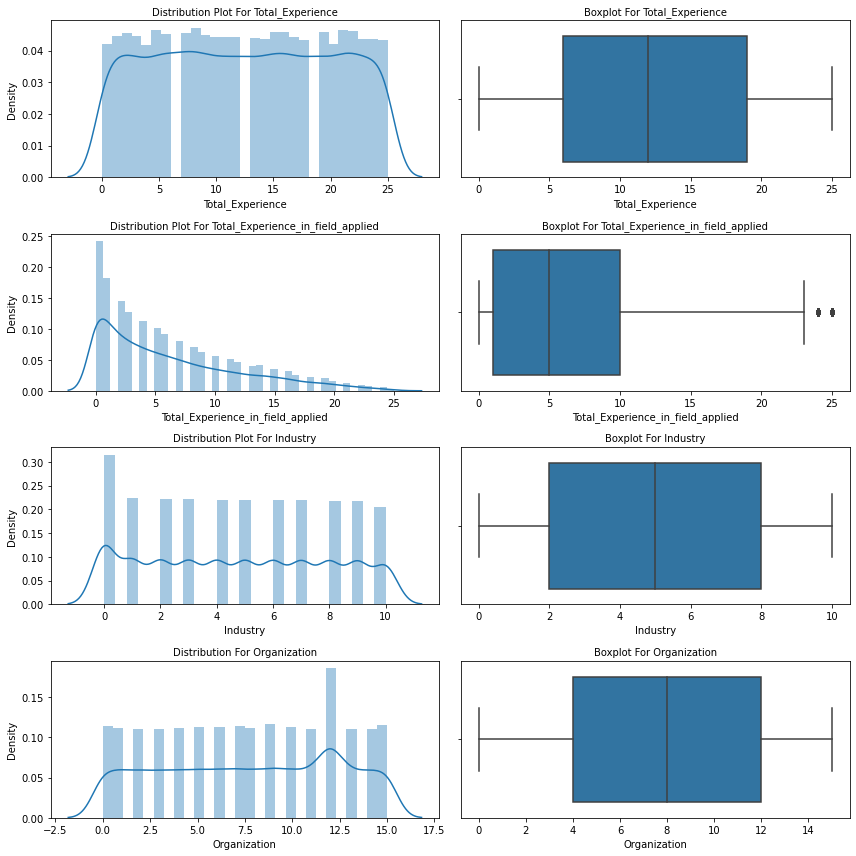

In [71]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,12)
a = sns.distplot(data['Total_Experience'] , ax=axes[0][0])
a.set_title("Distribution Plot For Total_Experience",fontsize=10)

a = sns.boxplot(data['Total_Experience'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For Total_Experience",fontsize=10)

a = sns.distplot(data['Total_Experience_in_field_applied'] , ax=axes[1][0])
a.set_title("Distribution Plot For Total_Experience_in_field_applied",fontsize=10)

a = sns.boxplot(data['Total_Experience_in_field_applied'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For Total_Experience_in_field_applied",fontsize=10)


a = sns.distplot(data['Industry'] , ax=axes[2][0])
a.set_title("Distribution Plot For Industry",fontsize=10)

a = sns.boxplot(data['Industry'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For Industry",fontsize=10)


a = sns.distplot(data['Organization'] , ax=axes[3][0])
a.set_title("Distribution For Organization",fontsize=10)

a = sns.boxplot(data['Organization'] , orient = "v" , ax=axes[3][1])
a.set_title("Boxplot For Organization",fontsize=10)

plt.tight_layout()
plt.show()

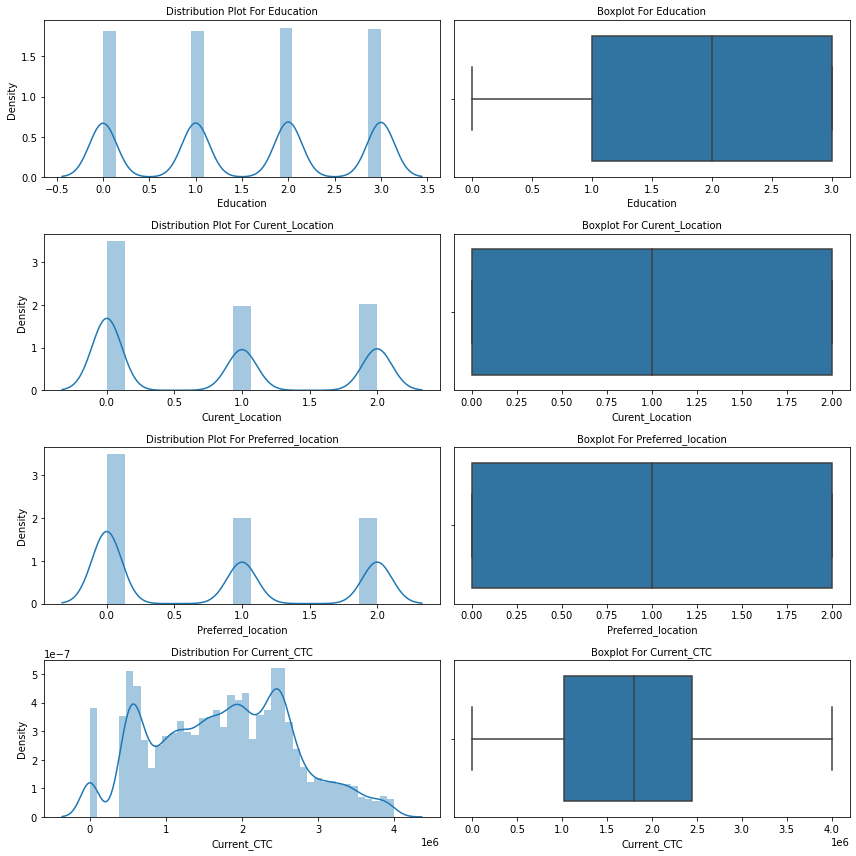

In [72]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,12)
a = sns.distplot(data['Education'] , ax=axes[0][0])
a.set_title("Distribution Plot For Education",fontsize=10)

a = sns.boxplot(data['Education'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For Education",fontsize=10)

a = sns.distplot(data['Curent_Location'] , ax=axes[1][0])
a.set_title("Distribution Plot For Curent_Location",fontsize=10)

a = sns.boxplot(data['Curent_Location'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For Curent_Location",fontsize=10)


a = sns.distplot(data['Preferred_location'] , ax=axes[2][0])
a.set_title("Distribution Plot For Preferred_location",fontsize=10)

a = sns.boxplot(data['Preferred_location'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For Preferred_location",fontsize=10)


a = sns.distplot(data['Current_CTC'] , ax=axes[3][0])
a.set_title("Distribution For Current_CTC",fontsize=10)

a = sns.boxplot(data['Current_CTC'] , orient = "v" , ax=axes[3][1])
a.set_title("Boxplot For Current_CTC",fontsize=10)

plt.tight_layout()
plt.show()

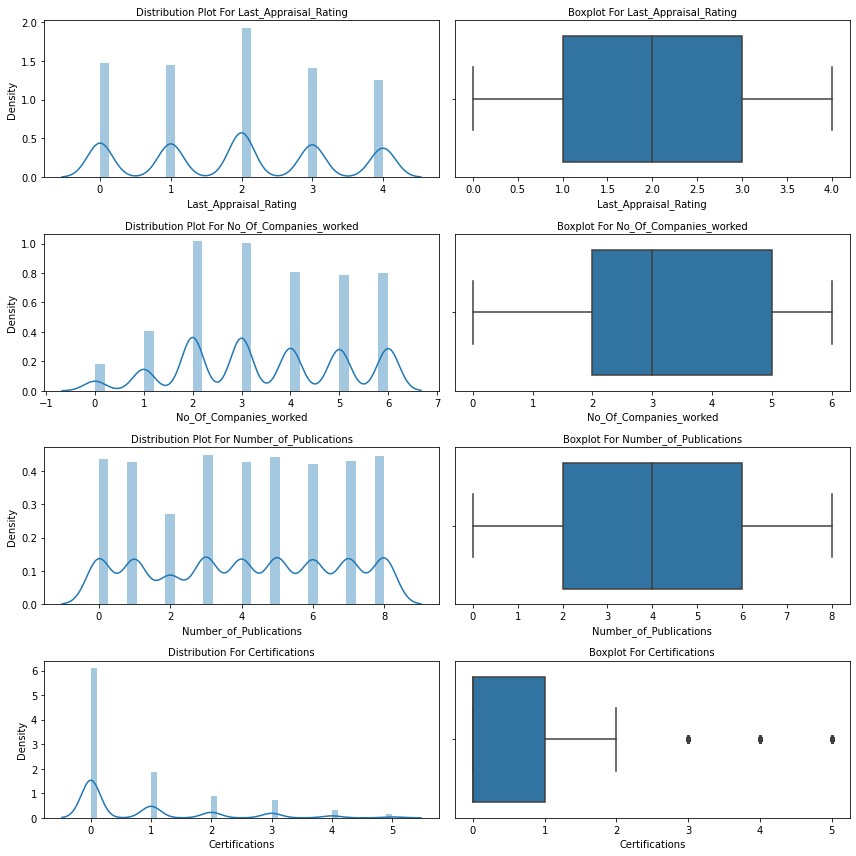

In [73]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,12)
a = sns.distplot(data['Last_Appraisal_Rating'] , ax=axes[0][0])
a.set_title("Distribution Plot For Last_Appraisal_Rating",fontsize=10)

a = sns.boxplot(data['Last_Appraisal_Rating'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For Last_Appraisal_Rating",fontsize=10)

a = sns.distplot(data['No_Of_Companies_worked'] , ax=axes[1][0])
a.set_title("Distribution Plot For No_Of_Companies_worked",fontsize=10)

a = sns.boxplot(data['No_Of_Companies_worked'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For No_Of_Companies_worked",fontsize=10)


a = sns.distplot(data['Number_of_Publications'] , ax=axes[2][0])
a.set_title("Distribution Plot For Number_of_Publications",fontsize=10)

a = sns.boxplot(data['Number_of_Publications'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For Number_of_Publications",fontsize=10)


a = sns.distplot(data['Certifications'] , ax=axes[3][0])
a.set_title("Distribution For Certifications",fontsize=10)

a = sns.boxplot(data['Certifications'] , orient = "v" , ax=axes[3][1])
a.set_title("Boxplot For Certifications",fontsize=10)

plt.tight_layout()
plt.show()

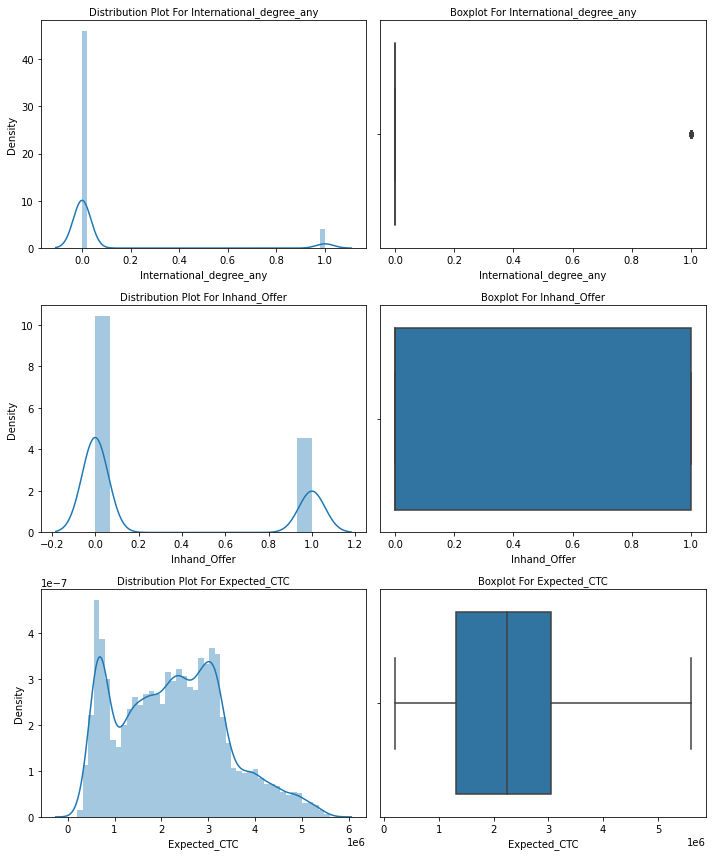

In [74]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,12)
a = sns.distplot(data['International_degree_any'] , ax=axes[0][0])
a.set_title("Distribution Plot For International_degree_any",fontsize=10)

a = sns.boxplot(data['International_degree_any'] , orient = "v" , ax=axes[0][1])
a.set_title("Boxplot For International_degree_any",fontsize=10)

a = sns.distplot(data['Inhand_Offer'] , ax=axes[1][0])
a.set_title("Distribution Plot For Inhand_Offer",fontsize=10)

a = sns.boxplot(data['Inhand_Offer'] , orient = "v" , ax=axes[1][1])
a.set_title("Boxplot For Inhand_Offer",fontsize=10)


a = sns.distplot(data['Expected_CTC'] , ax=axes[2][0])
a.set_title("Distribution Plot For Expected_CTC",fontsize=10)

a = sns.boxplot(data['Expected_CTC'] , orient = "v" , ax=axes[2][1])
a.set_title("Boxplot For Expected_CTC",fontsize=10)


plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Total_Experience'}>,
        <AxesSubplot:title={'center':'Total_Experience_in_field_applied'}>,
        <AxesSubplot:title={'center':'Industry'}>,
        <AxesSubplot:title={'center':'Organization'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Curent_Location'}>,
        <AxesSubplot:title={'center':'Preferred_location'}>,
        <AxesSubplot:title={'center':'Current_CTC'}>],
       [<AxesSubplot:title={'center':'Last_Appraisal_Rating'}>,
        <AxesSubplot:title={'center':'No_Of_Companies_worked'}>,
        <AxesSubplot:title={'center':'Number_of_Publications'}>,
        <AxesSubplot:title={'center':'Certifications'}>],
       [<AxesSubplot:title={'center':'International_degree_any'}>,
        <AxesSubplot:title={'center':'Expected_CTC'}>,
        <AxesSubplot:title={'center':'Inhand_Offer'}>, <AxesSubplot:>]],
      dtype=object)

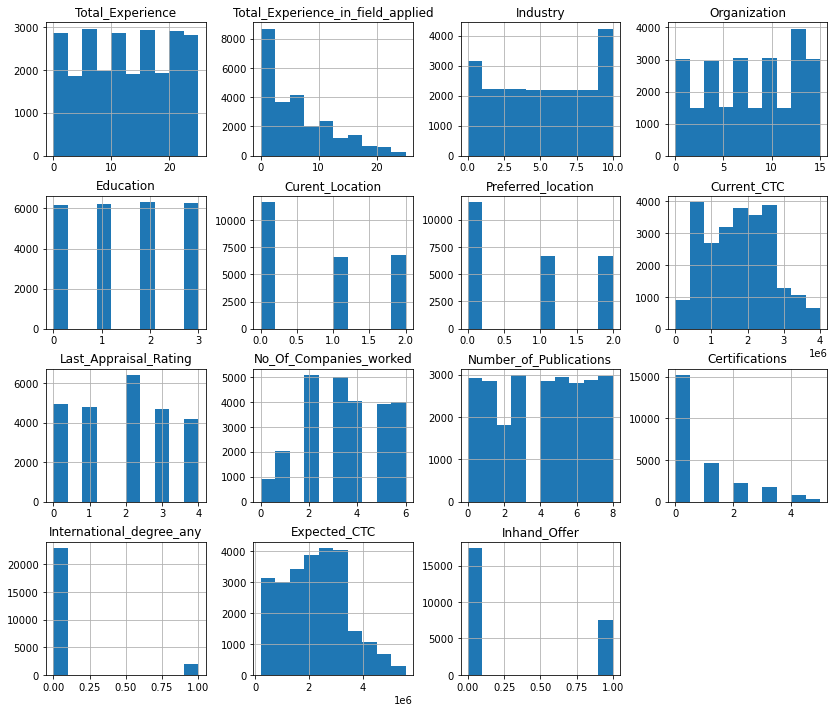

In [75]:
data.iloc[:,0:15].hist(figsize=(14,12))

### Bivariate Analysis

#### Countplot

<AxesSubplot:xlabel='Industry', ylabel='count'>

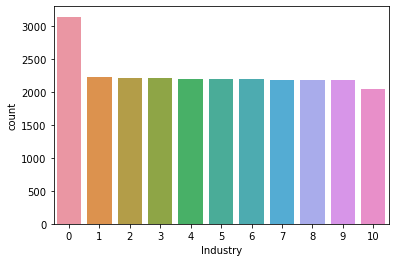

In [76]:
sns.countplot(data.Industry)

<AxesSubplot:xlabel='Organization', ylabel='count'>

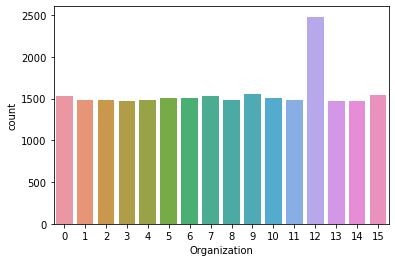

In [77]:
sns.countplot(data.Organization)

<AxesSubplot:xlabel='Curent_Location', ylabel='count'>

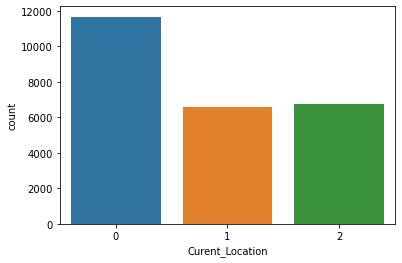

In [78]:
sns.countplot(data.Curent_Location)

<AxesSubplot:xlabel='Preferred_location', ylabel='count'>

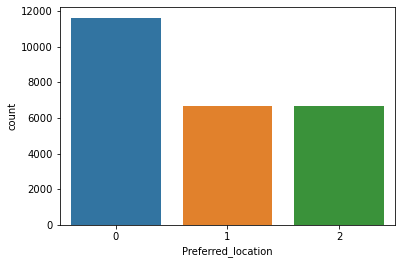

In [79]:
sns.countplot(data.Preferred_location)

<AxesSubplot:xlabel='Inhand_Offer', ylabel='count'>

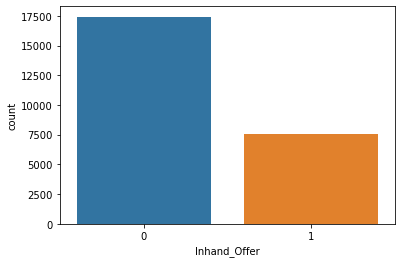

In [80]:
sns.countplot(data.Inhand_Offer)

<AxesSubplot:xlabel='Last_Appraisal_Rating', ylabel='count'>

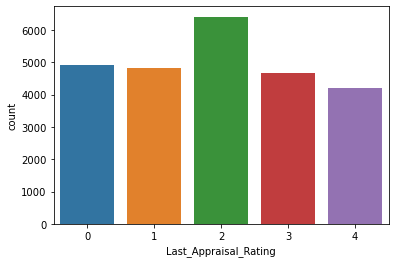

In [81]:
sns.countplot(data.Last_Appraisal_Rating)

#### Correlation Matrix

In [82]:
corr = data.corr()
corr

,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Curent_Location,Preferred_location,Current_CTC,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Inhand_Offer
Total_Experience,1.000000,0.645135,0.098728,-0.073088,0.023036,0.007283,-0.001081,0.846476,0.053481,0.398135,-0.000494,-0.001130,0.084072,0.816593,0.057390
Total_Experience_in_field_applied,0.645135,1.000000,0.066946,-0.043967,0.017786,0.003272,-0.000822,0.548017,0.037002,0.249045,-0.010663,-0.002814,0.043070,0.529115,0.029298
Industry,0.098728,0.066946,1.000000,-0.059656,-0.002715,0.006107,0.002121,0.108649,-0.004837,0.116356,0.005859,0.009726,0.013353,0.083108,0.055270
Organization,-0.073088,-0.043967,-0.059656,1.000000,-0.000150,0.002374,0.000992,-0.077749,-0.004811,-0.077736,0.000772,-0.001450,-0.010051,-0.061631,-0.024219
Education,0.023036,0.017786,-0.002715,-0.000150,1.000000,0.003801,-0.007327,0.294165,0.006569,-0.001687,-0.002820,-0.500894,0.002334,0.359005,0.013519
Curent_Location,0.007283,0.003272,0.006107,0.002374,0.003801,1.000000,0.006788,0.012050,0.002255,-0.006081,-0.004114,-0.107803,0.002631,0.012829,-0.009507
Preferred_location,-0.001081,-0.000822,0.002121,0.000992,-0.007327,0.006788,1.000000,0.000174,0.000913,0.002995,0.000998,-0.000969,-0.006128,-0.000271,0.004156
Current_CTC,0.846476,0.548017,0.108649,-0.077749,0.294165,0.012050,0.000174,1.000000,0.063031,0.379740,-0.006399,-0.143402,0.078774,0.986718,0.068238
Last_Appraisal_Rating,0.053481,0.037002,-0.004837,-0.004811,0.006569,0.002255,0.000913,0.063031,1.000000,0.034768,-0.005386,-0.008832,0.016846,0.148601,0.313313
No_Of_Companies_worked,0.398135,0.249045,0.116356,-0.077736,-0.001687,-0.006081,0.002995,0.379740,0.034768,1.000000,0.000608,0.012990,0.047270,0.343150,0.059160


#### Scatter Plot

<AxesSubplot:xlabel='Current_CTC', ylabel='Total_Experience'>

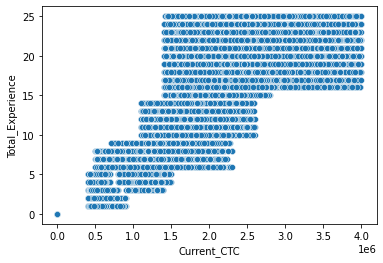

In [83]:
plt.figure(figsize=(6,4))
sns.scatterplot(data.Current_CTC,data.Total_Experience)

<AxesSubplot:xlabel='Curent_Location', ylabel='Organization'>

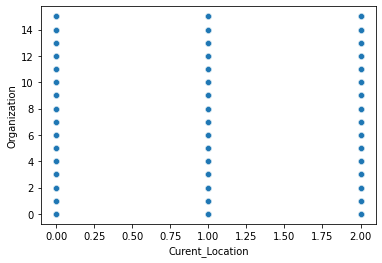

In [84]:
plt.figure(figsize=(6,4))
sns.scatterplot(data.Curent_Location,data.Organization)

<AxesSubplot:xlabel='Preferred_location', ylabel='Organization'>

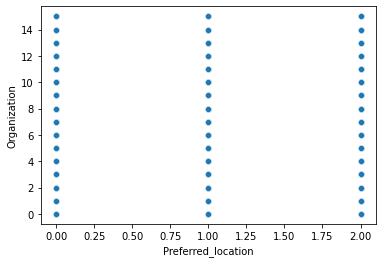

In [85]:
plt.figure(figsize=(6,4))
sns.scatterplot(data.Preferred_location,data.Organization)

### Multivariate Analysis

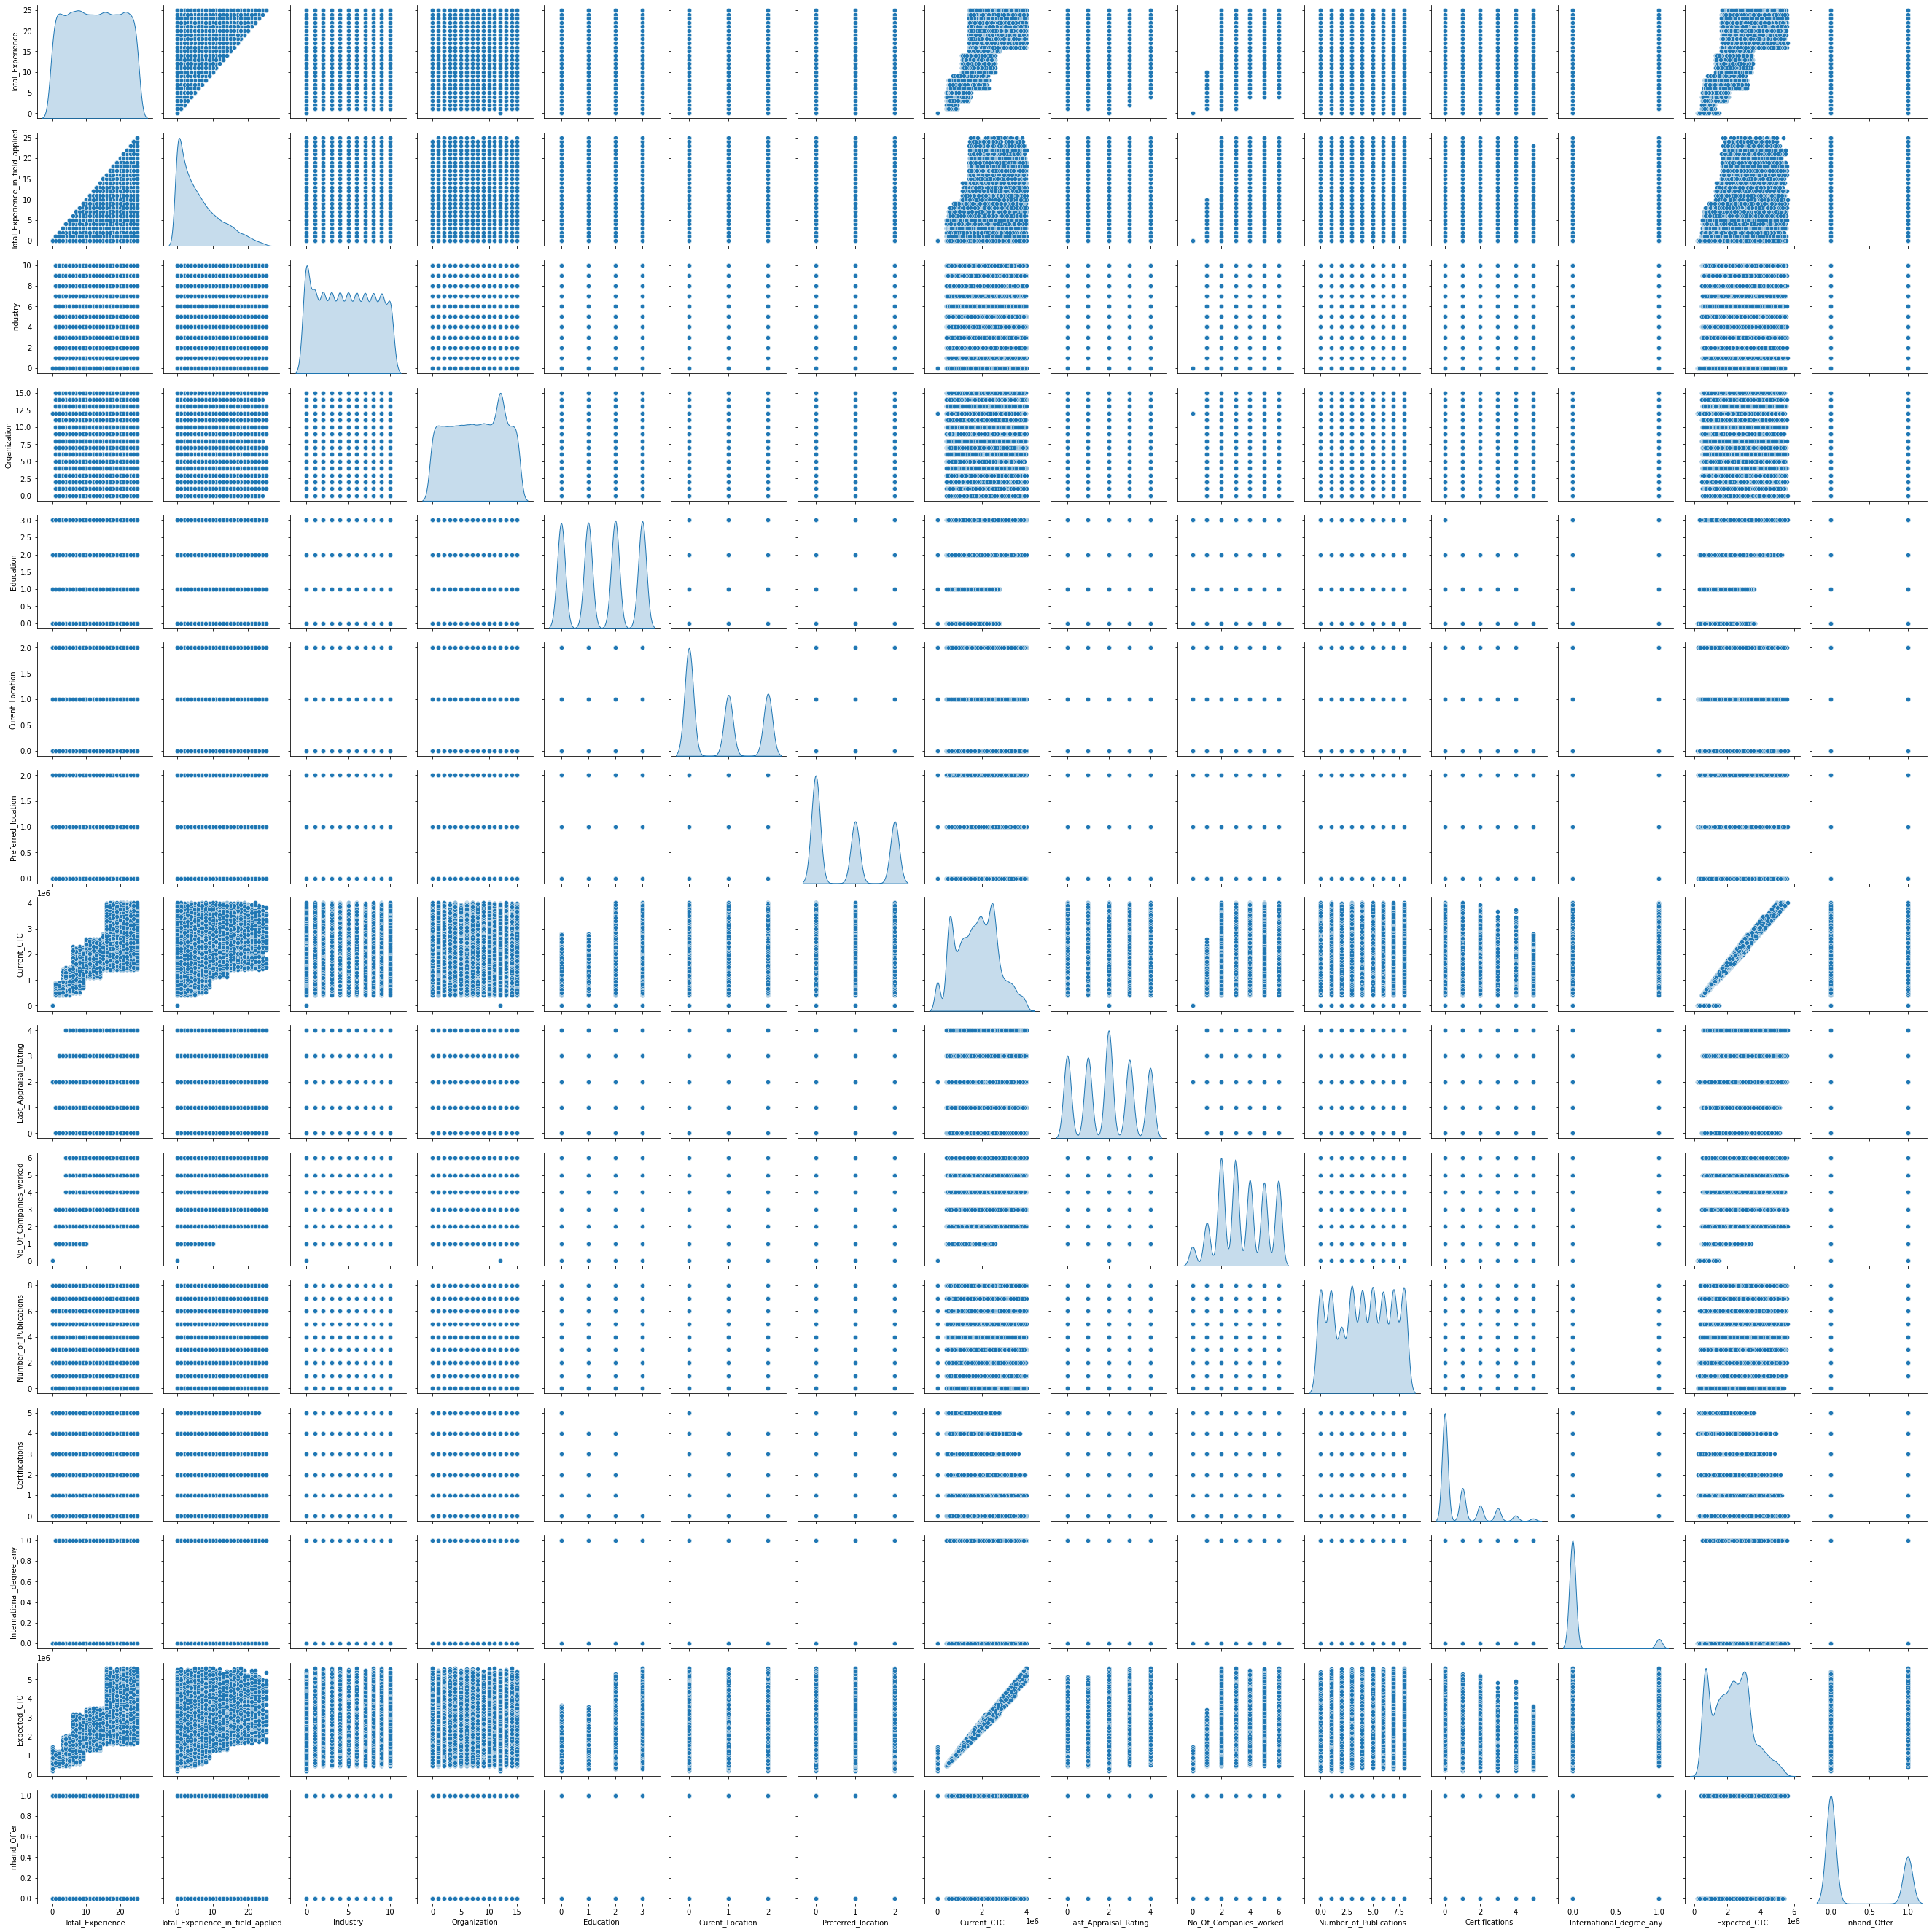

In [86]:
sns.pairplot(data,diag_kind='kde')

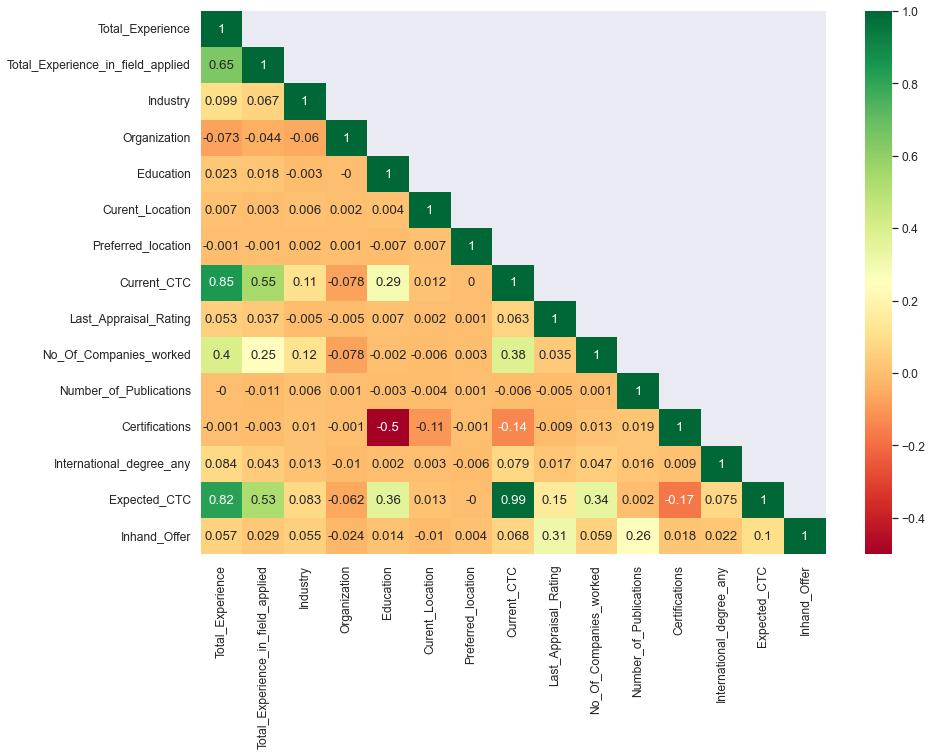

In [87]:
# construct heatmap with only continuous variables
plt.figure(figsize=(14,10))
sns.set(font_scale=1.1)
sns.heatmap(corr.round(3),annot=True,mask=np.triu(corr,+1),cmap='RdYlGn');

### Outliers

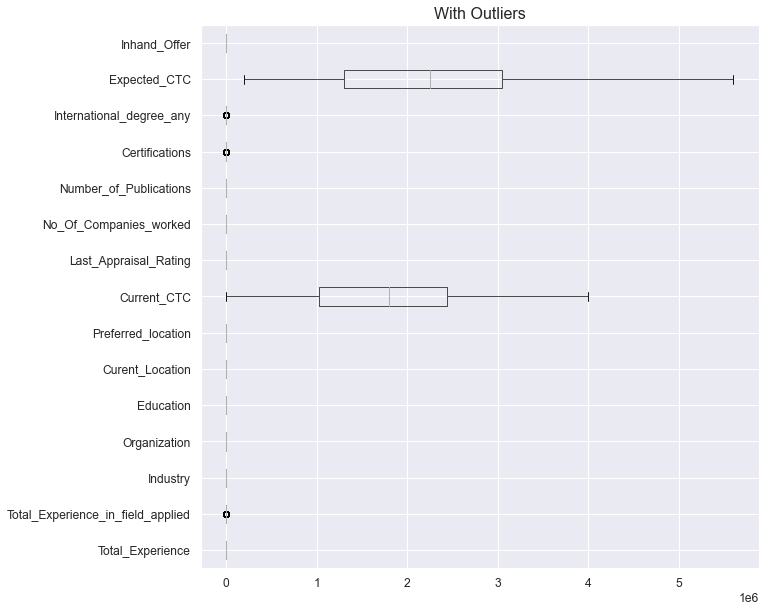

In [88]:
# construct box plot for continuous variables
# All the columns have outliers
cont=data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

**Interpretation :**
- The presence of outliers and influential cases can dramatically change the magnitude of regression coefficients and even the direction of coefficient signs (i.e., from positive to negative or vice versa). 
- So, these outliers must be find out and shall be treated in order to perform linear regression.

In [89]:
from pandas import Series
data_iqr = Series.to_frame(data.quantile(0.75) - data.quantile(0.25))
data_iqr 

,0
Total_Experience,13.00
Total_Experience_in_field_applied,9.00
Industry,6.00
Organization,8.00
Education,2.00
Curent_Location,2.00
Preferred_location,2.00
Current_CTC,1416571.75
Last_Appraisal_Rating,2.00
No_Of_Companies_worked,3.00


All the __Outliers__ present in all three variables are as follows : 

In [90]:
Q1_Certifications = np.percentile(data['Certifications'], 25, interpolation = 'midpoint')
Q2_Certifications = np.percentile(data['Certifications'], 50, interpolation = 'midpoint')  
Q3_Certifications = np.percentile(data['Certifications'], 75, interpolation = 'midpoint')
IQR_Certifications= Q3_Certifications - Q1_Certifications
print('Interquartile range is', IQR_Certifications)
low_lim_Certifications = Q1_Certifications - 1.5 * IQR_Certifications
up_lim_Certifications = Q3_Certifications + 1.5 * IQR_Certifications
print('low_limit is', low_lim_Certifications)
print('up_limit is', up_lim_Certifications)
outlier_Certifications =[]
for x in data['Certifications']:
    if ((x> up_lim_Certifications) or (x<low_lim_Certifications)):
         outlier_Certifications.append(x)
print(' outlier in the dataset is', outlier_Certifications)


Interquartile range is 1.0
low_limit is -1.5
up_limit is 2.5
 outlier in the dataset is [5, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 5, 4, 3, 3, 4, 3, 3, 5, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 5, 3, 5, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 5, 3, 3, 4, 3, 5, 3, 3, 3, 3, 3, 5, 4, 3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 3, 3, 5, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 5, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 5, 5, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 5, 3, 4, 5, 3, 3, 3, 3, 5, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 5, 3, 4, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 5, 3, 3, 3, 5, 3, 3, 5, 3, 4, 4, 5, 3, 4, 4, 4, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 4, 3, 3, 4, 3, 3, 3, 5, 3, 3, 5, 4, 3, 3, 3, 3, 3, 4, 3, 4, 5, 3, 3, 3, 3, 5, 3, 4, 4, 3, 3, 4, 3, 3, 4, 5, 3, 4, 3, 3, 4,

In [91]:
data['Certifications'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: Certifications, dtype: int64

In [92]:
(data['Certifications'] > 2.5).value_counts()

False    22057
True      2943
Name: Certifications, dtype: int64

In [93]:
outlier_filter_Certifications = data['Certifications'] < 2.5
data = data[outlier_filter_Certifications]

In [94]:
(data['Certifications'] > 2.5).value_counts()

False    22057
Name: Certifications, dtype: int64

__Outlier__ from __"Certifications"__ Removed Successfully.

In [95]:
Q1_Total_Experience_in_field_applied = np.percentile(data['Total_Experience_in_field_applied'], 25, interpolation = 'midpoint')
Q2_Total_Experience_in_field_applied = np.percentile(data['Total_Experience_in_field_applied'], 50, interpolation = 'midpoint')  
Q3_Total_Experience_in_field_applied = np.percentile(data['Total_Experience_in_field_applied'], 75, interpolation = 'midpoint')
IQR_Total_Experience_in_field_applied = Q3_Total_Experience_in_field_applied - Q1_Total_Experience_in_field_applied
print('Interquartile range is', IQR_Total_Experience_in_field_applied)
low_lim_Total_Experience_in_field_applied = Q1_Total_Experience_in_field_applied - 1.5 * IQR_Total_Experience_in_field_applied
up_lim_Total_Experience_in_field_applied = Q3_Total_Experience_in_field_applied + 1.5 * IQR_Total_Experience_in_field_applied
print('low_limit is', low_lim_Total_Experience_in_field_applied)
print('up_limit is', up_lim_Total_Experience_in_field_applied)
outlier =[]
for y in data['Total_Experience_in_field_applied']:
    if ((y > up_lim_Total_Experience_in_field_applied) or (y < low_lim_Total_Experience_in_field_applied)):
         outlier.append(y)
print(' outlier in the dataset is', outlier)


Interquartile range is 9.0
low_limit is -12.5
up_limit is 23.5
 outlier in the dataset is [25, 25, 25, 24, 24, 25, 24, 24, 24, 24, 24, 24, 25, 24, 24, 25, 24, 24, 24, 25, 25, 25, 24, 25, 24, 25, 24, 24, 24, 25, 25, 24, 24, 24, 25, 25, 24, 24, 25, 24, 24, 24, 24, 25, 24, 24, 25, 24, 24, 25, 24, 24, 24, 24, 25, 24, 24, 24, 24, 25, 24, 24, 24, 24, 25, 24, 25, 24, 24, 25, 24, 24, 24, 25, 24, 24, 24, 24, 24, 24, 25, 24, 24, 24, 24, 25, 24, 24, 25, 24, 24, 24, 24, 25, 24, 25, 24, 24, 25, 24, 24, 25, 24, 24, 24, 25, 25, 24, 24, 24, 24, 24, 25]


In [96]:
data['Total_Experience_in_field_applied'].value_counts()

0     3291
1     2456
2     1946
3     1688
4     1485
5     1339
6     1235
7     1082
8      958
9      836
10     764
11     686
12     638
14     546
13     540
15     477
16     444
17     346
18     295
19     277
20     216
21     178
22     124
23      97
24      78
25      35
Name: Total_Experience_in_field_applied, dtype: int64

In [97]:
(data['Total_Experience_in_field_applied'] > 23.5).value_counts()

False    21944
True       113
Name: Total_Experience_in_field_applied, dtype: int64

In [98]:
outlier_filter_Total_Experience_in_field_applied = data['Total_Experience_in_field_applied'] < 23.5
data = data[outlier_filter_Total_Experience_in_field_applied]

In [99]:
(data['Total_Experience_in_field_applied'] > 23.5).value_counts()

False    21944
Name: Total_Experience_in_field_applied, dtype: int64

__Outlier__ from __"Total_Experience_in_field_applied"__ Removed Successfully.

### Boxplot After Outlier Treatment

Checking boxplot after removal of outliers

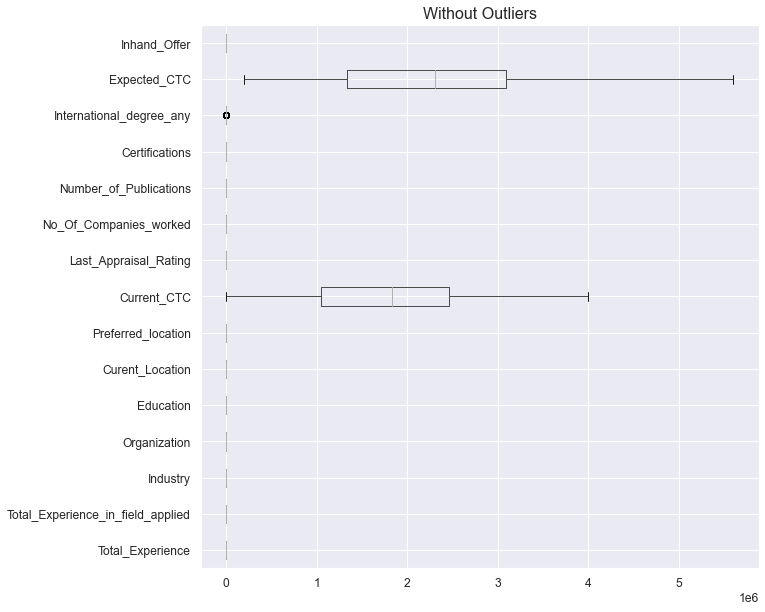

In [100]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

**Interpretations:**
- After inferring insights, it was confirmed that in __"International_degree_any"__ no outliers were present. The dots representing them are actual values and that are 0 & 1 only. They cannot be treated as outliers.
- Apart from that, outliers from other variables had been treated well.
- The boxplot with outliers and without outliers can easily be seen after comparing both boxplots.

In [101]:
import statsmodels.formula.api as SM

## Linear Regression Model

### Thumb rules to help interpret goodness of fit in Regression model
R-sq / Adj R-sq shows Goodness of fit. More favorable to have higher value (0-1)
Prob (F-statistic) Less than Alpha Reject
Log-Likelihood: - Goodness of fit (Higher the better when comparing multiple models)
AIC(Akaike's Information Criterion),BIC(Bayesian Information Criterion):- Goodness of fit (Lower the better the when comparing multiple models)

In [102]:
data.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Industry',
       'Organization', 'Education', 'Curent_Location', 'Preferred_location',
       'Current_CTC', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC', 'Inhand_Offer'],
      dtype='object')

#### Base Model / Model 1

In [103]:
formula_MLR_1 ='Expected_CTC~Total_Experience+Total_Experience_in_field_applied+Industry+Organization+Education+Curent_Location+Preferred_location+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any+Inhand_Offer'

In [104]:
model_MLR_1 = SM.ols(formula=formula_MLR_1,data=data).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.216e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:55   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21929   BIC:                         5.801e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -1.242e+05   4166.603    -29.818      0.000   -1.32e+05   -1.16e+05
Total_Experience                     79.6060    272.488      0.292      0.770    -454.491     613.703
Total_Experience_in_field_applied   -32.7446    204.342     -0.160      0.873    -433.269     367.780
Industry                          -7237.4487    281.327    -25.726      0.000   -7788.869   -6686.028
Organization                       3087.0167    195.558     15.786      0.000    2703.710    3470.324
Education                          7.915e+04   1021.596     77.479      0.000    7.72e+04    8.12e+04
Curent_Location                    1919.8534   1073.752      1.788      0.074    -184.778    4024.484
Preferred_location                  352.6345   1075.825      0.328      0.743   -1756.061    2461.330
Current_CTC                           1.2286      0.002    576.520      0.000       1.224       1.233
Last_Appraisal_Rating              7.479e+04    701.899    106.560      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked            -1.906e+04    584.104    -32.624      0.000   -2.02e+04   -1.79e+04
Number_of_Publications             3040.5282    357.278      8.510      0.000    2340.238    3740.818
Certifications                     2767.3163   1473.604      1.878      0.060    -121.054    5655.687
International_degree_any           -1.16e+04   3292.626     -3.524      0.000   -1.81e+04   -5151.016
Inhand_Offer                        2.05e+04   2159.064      9.496      0.000    1.63e+04    2.47e+04
==============================================================================
Omnibus:                    11935.057   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153747.662
Skew:                           2.343   Prob(JB):                         0.00
Kurtosis:                      15.091   Cond. No.                     9.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let us check and treat the multicollinearity problem if it is present.

Now, we will calculate the Variance Inflation Factor (VIF). We will calculate the Variance Inflation Factor by an user defined function.

VIF regresses the dependent variables amongst themselves and then calculates the VIF values based on the 𝑅2 of each such regression.

In [105]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [106]:
data.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Industry',
       'Organization', 'Education', 'Curent_Location', 'Preferred_location',
       'Current_CTC', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC', 'Inhand_Offer'],
      dtype='object')

In [107]:
vif_cal(input_data=data[['Total_Experience', 'Total_Experience_in_field_applied', 'Industry', 'Organization', 'Education',
       'Curent_Location', 'Preferred_location', 'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

Total_Experience  VIF =  5.14
Total_Experience_in_field_applied  VIF =  1.7
Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.52
Curent_Location  VIF =  1.0
Preferred_location  VIF =  1.0
Current_CTC  VIF =  4.92
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.22
Number_of_Publications  VIF =  1.09
Certifications  VIF =  1.19
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


**Interpretations :**
- From the __Base Model__ , we inferred that many variables have p_value higher than the significance vlaue(0.05).
- The variables that have higher p_value than significance value are __'Total_Experience'__ , __'Total_Experience_in_field_applied'__ , __'Curent_Location'__ , __'Preferred_location'__ , __'Certifications'__ .
- Out of all these, __'Total_Experience_in_field_applied'__ have maximum p_value, thus it is the most insignificant and shall be removed and a new model shall  be build.

#### 2nd MLR Model

In [108]:
formula_MLR_2 = 'Expected_CTC~Total_Experience+Industry+Organization+Education+Curent_Location+Preferred_location+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any+Inhand_Offer'

In [109]:
model_MLR_2 = SM.ols(formula=formula_MLR_2,data=data).fit()
model_MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.310e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:56   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21930   BIC:                         5.801e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.242e+05   4166.489    -29.819      0.000   -1.32e+05   -1.16e+05
Total_Experience            64.3350    255.275      0.252      0.801    -436.022     564.692
Industry                 -7237.5070    281.320    -25.727      0.000   -7788.915   -6686.099
Organization              3086.9103    195.552     15.786      0.000    2703.614    3470.207
Education                 7.915e+04   1021.550     77.484      0.000    7.72e+04    8.12e+04
Curent_Location           1919.5432   1073.726      1.788      0.074    -185.038    4024.124
Preferred_location         352.3593   1075.800      0.328      0.743   -1756.286    2461.005
Current_CTC                  1.2286      0.002    576.695      0.000       1.224       1.233
Last_Appraisal_Rating     7.479e+04    701.877    106.563      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked   -1.906e+04    584.082    -32.624      0.000   -2.02e+04   -1.79e+04
Number_of_Publications    3041.0081    357.257      8.512      0.000    2340.758    3741.258
Certifications            2767.3260   1473.571      1.878      0.060    -120.980    5655.632
International_degree_any  -1.16e+04   3292.056     -3.522      0.000    -1.8e+04   -5142.973
Inhand_Offer              2.051e+04   2158.946      9.498      0.000    1.63e+04    2.47e+04
==============================================================================
Omnibus:                    11935.100   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153747.603
Skew:                           2.343   Prob(JB):                         0.00
Kurtosis:                      15.091   Cond. No.                     9.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
vif_cal(input_data=data[['Total_Experience', 'Industry', 'Organization', 'Education',
       'Curent_Location', 'Preferred_location', 'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

Total_Experience  VIF =  4.51
Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.52
Curent_Location  VIF =  1.0
Preferred_location  VIF =  1.0
Current_CTC  VIF =  4.92
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.22
Number_of_Publications  VIF =  1.09
Certifications  VIF =  1.19
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


In [111]:
print('For the second MLR model:','\n')

print('Rsquared',model_MLR_1.rsquared)
print('Adjusted Rsquared',model_MLR_1.rsquared_adj)

For the second MLR model: 

Rsquared 0.9872874452105849
Adjusted Rsquared 0.9872793292104457


In [112]:
print('For the third MLR model:','\n')

print('Rsquared',model_MLR_2.rsquared)
print('Adjusted Rsquared',model_MLR_2.rsquared_adj)

For the third MLR model: 

Rsquared 0.9872874303245455
Adjusted Rsquared 0.9872798943735295


**Interpretations:**
- In the second model, there were some variables whose p_value exceed to that of the significance value and they were __'Total_Experience'__ , __'Curent_Location'__ , __'Preferred_location'__ , __'Certifications'__ .
- From all these, __'Total_Experience'__ had the maximum p_value and thus it is considered most insignificant and shall be removed and a new better model shall be created.

#### 3rd MLR Model

In [113]:
formula_MLR_3 = 'Expected_CTC~Industry+Organization+Education+Curent_Location+Preferred_location+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any+Inhand_Offer'

In [114]:
model_MLR_3 = SM.ols(formula=formula_MLR_3,data=data).fit()
model_MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.419e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:57   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21931   BIC:                         5.801e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.242e+05   4152.337    -29.900      0.000   -1.32e+05   -1.16e+05
Industry                 -7238.5679    281.283    -25.734      0.000   -7789.902   -6687.234
Organization              3086.8634    195.548     15.786      0.000    2703.576    3470.151
Education                 7.905e+04    942.645     83.864      0.000    7.72e+04    8.09e+04
Curent_Location           1919.1460   1073.702      1.787      0.074    -185.388    4023.680
Preferred_location         351.8010   1075.775      0.327      0.744   -1756.795    2460.397
Current_CTC                  1.2291      0.001   1113.421      0.000       1.227       1.231
Last_Appraisal_Rating     7.479e+04    701.824    106.568      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked   -1.904e+04    580.379    -32.804      0.000   -2.02e+04   -1.79e+04
Number_of_Publications    3042.3041    357.212      8.517      0.000    2342.142    3742.466
Certifications            2772.0625   1473.420      1.881      0.060    -115.947    5660.072
International_degree_any -1.158e+04   3291.084     -3.517      0.000    -1.8e+04   -5125.458
Inhand_Offer               2.05e+04   2158.834      9.496      0.000    1.63e+04    2.47e+04
==============================================================================
Omnibus:                    11939.824   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153971.162
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                      15.100   Cond. No.                     9.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
vif_cal(input_data=data[['Industry', 'Organization', 'Education',
       'Curent_Location', 'Preferred_location', 'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.29
Curent_Location  VIF =  1.0
Preferred_location  VIF =  1.0
Current_CTC  VIF =  1.32
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.21
Number_of_Publications  VIF =  1.09
Certifications  VIF =  1.19
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


**Interpretation:**
- We inferred from this model is that __'Preferred_location'__ , __'Curent_Location'__ , __'Certifications'__ were the only ones with high p_value than significance value.
- In addition, after considering all aspects, __'Preferred_location'__ was the only one with max p_value and thus it shall be removed and a further improved model shall be rebuild. 

#### 4th MLR Model

In [116]:
formula_MLR_4 = 'Expected_CTC~Industry+Organization+Education+Curent_Location+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any+Inhand_Offer'

In [117]:
model_MLR_4 = SM.ols(formula=formula_MLR_4,data=data).fit()
model_MLR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.548e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:57   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21932   BIC:                         5.801e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.239e+05   4061.960    -30.496      0.000   -1.32e+05   -1.16e+05
Industry                 -7238.6720    281.277    -25.735      0.000   -7789.995   -6687.349
Organization              3086.7926    195.544     15.786      0.000    2703.513    3470.072
Education                 7.905e+04    942.590     83.867      0.000    7.72e+04    8.09e+04
Curent_Location           1921.9496   1073.646      1.790      0.073    -182.474    4026.373
Current_CTC                  1.2291      0.001   1113.446      0.000       1.227       1.231
Last_Appraisal_Rating     7.479e+04    701.806    106.570      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked   -1.904e+04    580.360    -32.803      0.000   -2.02e+04   -1.79e+04
Number_of_Publications    3042.5212    357.205      8.518      0.000    2342.374    3742.668
Certifications            2772.1273   1473.390      1.881      0.060    -115.824    5660.078
International_degree_any -1.158e+04   3290.992     -3.519      0.000    -1.8e+04   -5129.840
Inhand_Offer               2.05e+04   2158.767      9.498      0.000    1.63e+04    2.47e+04
==============================================================================
Omnibus:                    11938.707   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153911.484
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                      15.098   Cond. No.                     9.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
vif_cal(input_data=data[['Industry', 'Organization', 'Education',
       'Curent_Location', 'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.29
Curent_Location  VIF =  1.0
Current_CTC  VIF =  1.32
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.21
Number_of_Publications  VIF =  1.09
Certifications  VIF =  1.19
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


**Interpretations :**
- Now, all the majority of insignificant variables were removed , but there were some variables which had slightly higher p_value than significance value. These variables were __'Curent_Location'__ & __'Certification'__.
- __'Curent_Location'__ had higher p_value among the two and thus it shall be removed.

#### 5th MLR Model

In [119]:
formula_MLR_5 = 'Expected_CTC~Industry+Organization+Education+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+Certifications+International_degree_any+Inhand_Offer'

In [120]:
model_MLR_5 = SM.ols(formula=formula_MLR_5,data=data).fit()
model_MLR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.703e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:58   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21933   BIC:                         5.801e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.221e+05   3943.549    -30.969      0.000    -1.3e+05   -1.14e+05
Industry                 -7233.0198    281.273    -25.715      0.000   -7784.336   -6681.704
Organization              3088.6429    195.551     15.795      0.000    2705.349    3471.937
Education                 7.897e+04    941.523     83.874      0.000    7.71e+04    8.08e+04
Current_CTC                  1.2291      0.001   1113.519      0.000       1.227       1.231
Last_Appraisal_Rating      7.48e+04    701.838    106.570      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked   -1.905e+04    580.346    -32.826      0.000   -2.02e+04   -1.79e+04
Number_of_Publications    3039.9151    357.220      8.510      0.000    2339.739    3740.091
Certifications            2651.0972   1471.912      1.801      0.072    -233.956    5536.151
International_degree_any -1.158e+04   3291.156     -3.517      0.000    -1.8e+04   -5124.877
Inhand_Offer              2.048e+04   2158.816      9.485      0.000    1.62e+04    2.47e+04
==============================================================================
Omnibus:                    11937.007   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153904.205
Skew:                           2.343   Prob(JB):                         0.00
Kurtosis:                      15.098   Cond. No.                     9.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
vif_cal(input_data=data[['Industry', 'Organization', 'Education',
       'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.29
Current_CTC  VIF =  1.32
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.21
Number_of_Publications  VIF =  1.09
Certifications  VIF =  1.19
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


**Interpretations:**
- We inferred from VIF and 5th MLR model that only __'Certification'__ was the only one left that had p_value higher than the significance value. Thus it shall be removed and a new model shall be build.

#### 6th MLR Model

In [122]:
formula_MLR_6 = 'Expected_CTC~Industry+Organization+Education+Current_CTC+Last_Appraisal_Rating+No_Of_Companies_worked+Number_of_Publications+International_degree_any+Inhand_Offer'

In [123]:
model_MLR_6 = SM.ols(formula=formula_MLR_6,data=data).fit()
model_MLR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expected_CTC   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.892e+05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:58   Log-Likelihood:            -2.8998e+05
No. Observations:               21944   AIC:                         5.800e+05
Df Residuals:                   21934   BIC:                         5.801e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.201e+05   3777.338    -31.792      0.000   -1.27e+05   -1.13e+05
Industry                 -7227.1469    281.269    -25.695      0.000   -7778.454   -6675.840
Organization              3092.5457    195.549     15.815      0.000    2709.256    3475.836
Education                 7.832e+04    870.851     89.941      0.000    7.66e+04       8e+04
Current_CTC                  1.2291      0.001   1113.463      0.000       1.227       1.231
Last_Appraisal_Rating      7.48e+04    701.874    106.567      0.000    7.34e+04    7.62e+04
No_Of_Companies_worked   -1.903e+04    580.300    -32.800      0.000   -2.02e+04   -1.79e+04
Number_of_Publications    3039.9551    357.238      8.510      0.000    2339.743    3740.167
International_degree_any -1.148e+04   3290.858     -3.487      0.000   -1.79e+04   -5025.612
Inhand_Offer              2.048e+04   2158.925      9.487      0.000    1.62e+04    2.47e+04
==============================================================================
Omnibus:                    11923.901   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153498.521
Skew:                           2.341   Prob(JB):                         0.00
Kurtosis:                      15.082   Cond. No.                     8.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
vif_cal(input_data=data[['Industry', 'Organization', 'Education',
       'Current_CTC', 'Last_Appraisal_Rating','No_Of_Companies_worked',
        'Number_of_Publications','International_degree_any','Inhand_Offer']])

Industry  VIF =  1.03
Organization  VIF =  1.01
Education  VIF =  1.1
Current_CTC  VIF =  1.32
Last_Appraisal_Rating  VIF =  1.13
No_Of_Companies_worked  VIF =  1.21
Number_of_Publications  VIF =  1.09
International_degree_any  VIF =  1.01
Inhand_Offer  VIF =  1.22


**Interpretations :**
- We inferred that all the p_value are below the significance value and VIF values are also in the correct range.
- Now, all statistical parameters being checked , so this model had all the appropriate things which must be required in our linear regression model.

In [125]:
print('For the first Base MLR model:','\n')

print('Rsquared',model_MLR_1.rsquared)
print('Adjusted Rsquared',model_MLR_1.rsquared_adj)

For the first Base MLR model: 

Rsquared 0.9872874452105849
Adjusted Rsquared 0.9872793292104457


In [126]:
print('For the sixth MLR model:','\n')

print('Rsquared',model_MLR_6.rsquared)
print('Adjusted Rsquared',model_MLR_6.rsquared_adj)

For the sixth MLR model: 

Rsquared 0.9872835934803579
Adjusted Rsquared 0.9872783756605951


Interpretations :

Hence __6th MLR Model__ is the best model as per the analysis.

In [127]:
model_MLR_6_pred = model_MLR_6.fittedvalues
model_MLR_6_pred

0        2.232657e+05
1        3.716007e+06
2        3.125422e+06
3        2.643021e+06
4        2.376188e+06
             ...     
24995    4.335466e+06
24996    1.584283e+06
24997    1.955695e+06
24998    4.209837e+06
24999    1.330591e+06
Length: 21944, dtype: float64

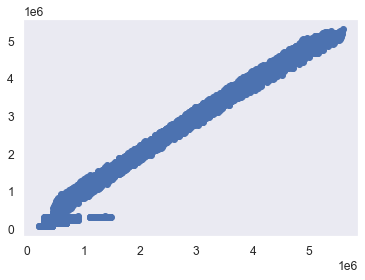

In [128]:
#this shows the predicted and actuals are very close to eachother. Hence the R2 is also high
plt.scatter(data['Expected_CTC'],model_MLR_6_pred)
plt.grid();

**Interpretations :**
- As per the scatter plot, we inferred that  the predicted and actuals are very close to eachother. Hence the R2 is high

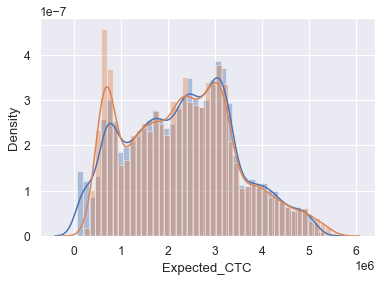

In [129]:
#blue is the fittedvalues(predicted) and orange is the actual values
sns.distplot(model_MLR_6.fittedvalues)
sns.distplot(data['Expected_CTC']);

**__Conclusion__**
- From the distplot, we inferred that the predicted values and actual values were predicting very much likely or in other words we can say they are very much similar to each other.
- It means that our linear regression model was very good.

<AxesSubplot:>

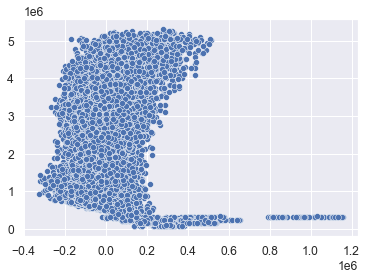

In [130]:
#Linear Relationship b/w Dependent and Independent Varaibles 

sns.scatterplot(model_MLR_6.resid,model_MLR_6.fittedvalues)


<AxesSubplot:title={'center':'Boxplot of the residuals'}>

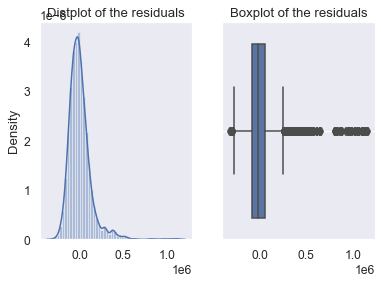

In [131]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_MLR_6.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_MLR_6.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

#### Expected_CTC = (Industry x (-7227.1469)) + (Organization x 3092.5457) + (Education x 7.832e+04) + (Current_CTC x 1.2291) + (Last_Appraisal_Rating x 7.48e+04) + (No_Of_Companies_worked x (-1.903e+04)) + (Number_of_Publications x 3039.9551) + (Internation_degree_any x (-1.148+04)) + (Inhand_Offer x 2.048e+04)

### Linear Regression Model Using Sklearn

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
data.head()

,Total_Experience,Total_Experience_in_field_applied,Industry,Organization,Education,Curent_Location,Preferred_location,Current_CTC,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Inhand_Offer
0,0,0,0,12,2,2,0,0,2,0,0,0,0,384551,0
1,23,14,5,7,3,0,2,2702664,4,2,4,0,0,3783729,1
2,21,12,0,9,3,0,1,2236661,4,5,3,0,0,3131325,1
3,15,8,8,5,3,1,0,2100510,1,5,3,0,0,2608833,0
4,10,5,2,4,1,0,0,1931644,1,2,3,0,0,2221390,0


Splitting the data into the dependent and independent variables.

In [134]:
data.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Industry',
       'Organization', 'Education', 'Curent_Location', 'Preferred_location',
       'Current_CTC', 'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC', 'Inhand_Offer'],
      dtype='object')

In [135]:
# Copy all the predictor variables into X dataframe. Since 'Expected_CTC' is dependent variable drop it

X = data[['Total_Experience', 'Total_Experience_in_field_applied', 'Industry', 'Organization', 'Education',
       'Curent_Location', 'Preferred_location', 'Current_CTC', 'Last_Appraisal_Rating',
       'No_Of_Companies_worked','Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']].copy()

# Copy the 'Expected_CTC' column alone into the y dataframe. This is the dependent variable
Y = data['Expected_CTC']

Splitting the data into train (70%) and test (30%).

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # for checking mean sum of square errors


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [138]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Base Model  building using sklearn Linear Regression 

In [139]:
model_base = lr.fit(X_train[['Total_Experience','Total_Experience_in_field_applied','Industry','Organization','Education','Curent_Location',
                             'Preferred_location','Current_CTC','Last_Appraisal_Rating','No_Of_Companies_worked','Number_of_Publications',
                             'Certifications','International_degree_any','Inhand_Offer']],y_train)

In [140]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['Total_Experience','Total_Experience_in_field_applied','Industry','Organization','Education',
                                               'Curent_Location','Preferred_location','Current_CTC','Last_Appraisal_Rating','No_Of_Companies_worked',
                                               'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']]) 

In [141]:
#Test Data Prediction

model_base_test = model_base.predict(X_test[['Total_Experience','Total_Experience_in_field_applied','Industry','Organization','Education',
                                               'Curent_Location','Preferred_location','Current_CTC','Last_Appraisal_Rating','No_Of_Companies_worked',
                                               'Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']])

In [142]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 132572.58
Test Data RMSE of model_base: 132909.18


**Interpretations :**
- As we can see that RMSE(Root Mean Square Error) for train and test data were not that much similar and their was some difference between them.

In [143]:
resultDf_trn = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base],'RMSE Test Data':[RMSE_Test_base]},index=['Base Model'])
resultDf_trn

,RMSE Training Data,RMSE Test Data
Base Model,132572.58,132909.18


#### 6th MLR Model using Sklearn

In [144]:
model_6 = lr.fit(X_train[['Industry','Organization','Education','Curent_Location','Current_CTC',
                          'Last_Appraisal_Rating','No_Of_Companies_worked','Number_of_Publications',
                          'International_degree_any','Inhand_Offer']],y_train)

In [145]:
#Training Data Prediction

model_6_pred_train = model_6.predict(X_train[['Industry','Organization','Education','Curent_Location','Current_CTC',
                          'Last_Appraisal_Rating','No_Of_Companies_worked','Number_of_Publications',
                          'International_degree_any','Inhand_Offer']])

In [146]:
#Test Data Prediction

model_6_pred_test = model_6.predict(X_test[['Industry','Organization','Education','Curent_Location','Current_CTC',
                          'Last_Appraisal_Rating','No_Of_Companies_worked','Number_of_Publications',
                          'International_degree_any','Inhand_Offer']])

RMSE check for all the model built

In [147]:
print('Training Data RMSE of model_6:',mean_squared_error(y_train,model_6_pred_train,squared=False))
print('Test Data RMSE of model_6:',mean_squared_error(y_test,model_6_pred_test,squared=False))

Training Data RMSE of model_6: 132598.99076602104
Test Data RMSE of model_6: 132871.0361784244


**Interpretations :**
- We noticed that, the RMSE(Root Mean Square Error) for both train and test were very close to each other and similar.
- Hence, we can state that 'model 6' was the best model that was build.
- Thus we can say that the best model had a very good prediction and can be considered as a very good fit model.

<AxesSubplot:xlabel='Expected_CTC'>

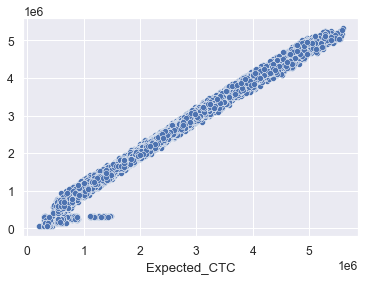

In [148]:
sns.scatterplot(y_train,model_6_pred_train)

<AxesSubplot:xlabel='Expected_CTC'>

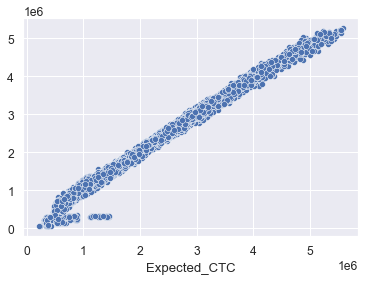

In [149]:
sns.scatterplot(y_test,model_6_pred_test)

**Interpretations :**
- This shows a linear relationship as the __predicted__ and __actuals__ values were very close to each other. Hence the R2 is also high.
- We inferred that both scatter plots for train and test are quite similar.
- It means that the model we build using sklearn library was a very good model. It fits well.

**Conclusion:**
- Hence __Model 6__ is the __Best Model__ said to be a very good linear regression model as its __prediction value__ is very close to the __actual value__.

### Comparing the Base & Best Model Build Using Sklearn library

In [150]:
print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)


Training Data RMSE of model_base: 132572.58
Test Data RMSE of model_base: 132909.18


In [151]:
print('Training Data RMSE of model_6:',mean_squared_error(y_train,model_6_pred_train,squared=False))
print('Test Data RMSE of model_6:',mean_squared_error(y_test,model_6_pred_test,squared=False))

Training Data RMSE of model_6: 132598.99076602104
Test Data RMSE of model_6: 132871.0361784244


**Conclusion :**
- This comparison of RMSE of both base model and best model had clearly shown that the best model was very similar/very close to each other for the value of RMSE(Root Mean Square Error)
- It indicated that best model was an absolute fit of the model to the data meaning how close the observed data were to the model's predicted values.

### Final Conclusion 

- Both of the models ( models build using statsmodel and sklearn library) gave strong high postive linear relationship but still if looking the gap values and other parameters such as accuracy etc, the best model among both of them was considered __Best Model From Statsmodel Library__ as this model provided a very strong accuracy prediction which is the objective for this linear regression question.

## Non Linear Models

### Lasso Regression

In [152]:
X = data[['Total_Experience', 'Total_Experience_in_field_applied', 'Industry', 'Organization', 'Education',
       'Curent_Location', 'Preferred_location', 'Current_CTC', 'Last_Appraisal_Rating',
       'No_Of_Companies_worked','Number_of_Publications','Certifications','International_degree_any','Inhand_Offer']].copy()

# Copy the 'Expected_CTC' column alone into the y dataframe. This is the dependent variable
Y = data['Expected_CTC']

array([[<AxesSubplot:title={'center':'Expected_CTC_New'}>,
        <AxesSubplot:title={'center':'log(Expected_CTC + 1)'}>]],
      dtype=object)

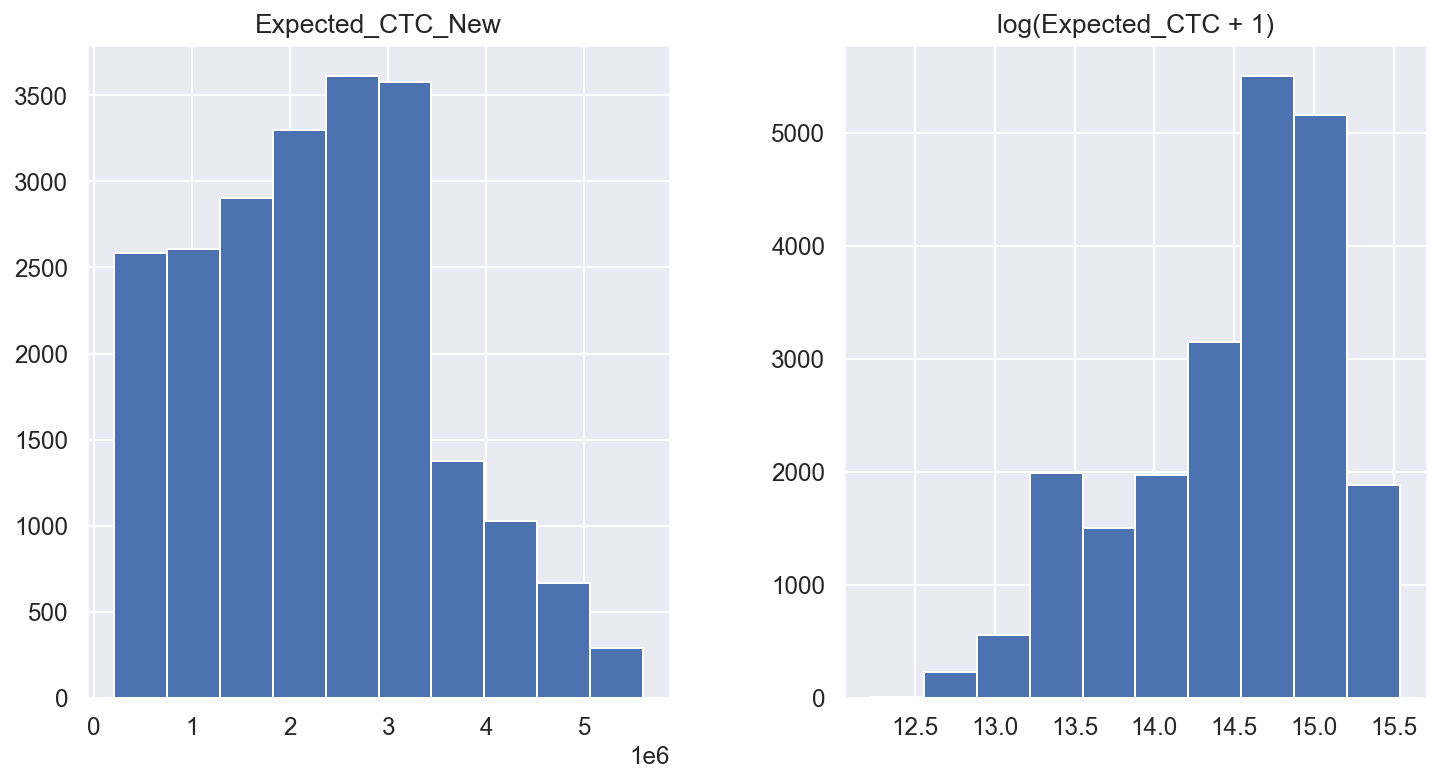

In [153]:
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
Expected_CTC_New = pd.DataFrame({"Expected_CTC_New":data["Expected_CTC"], "log(Expected_CTC + 1)":np.log1p(data["Expected_CTC"])})
Expected_CTC_New.hist()

In [154]:
#log transform the target:
data["Expected_CTC"] = np.log1p(data["Expected_CTC"])

#log transform skewed numeric features:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])


In [155]:
#creating matrices for sklearn:
X_train = data[:data.shape[0]]
X_test = data[data.shape[0]:]
y = data.Expected_CTC

In [156]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [157]:
model_ridge = Ridge()

In [158]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

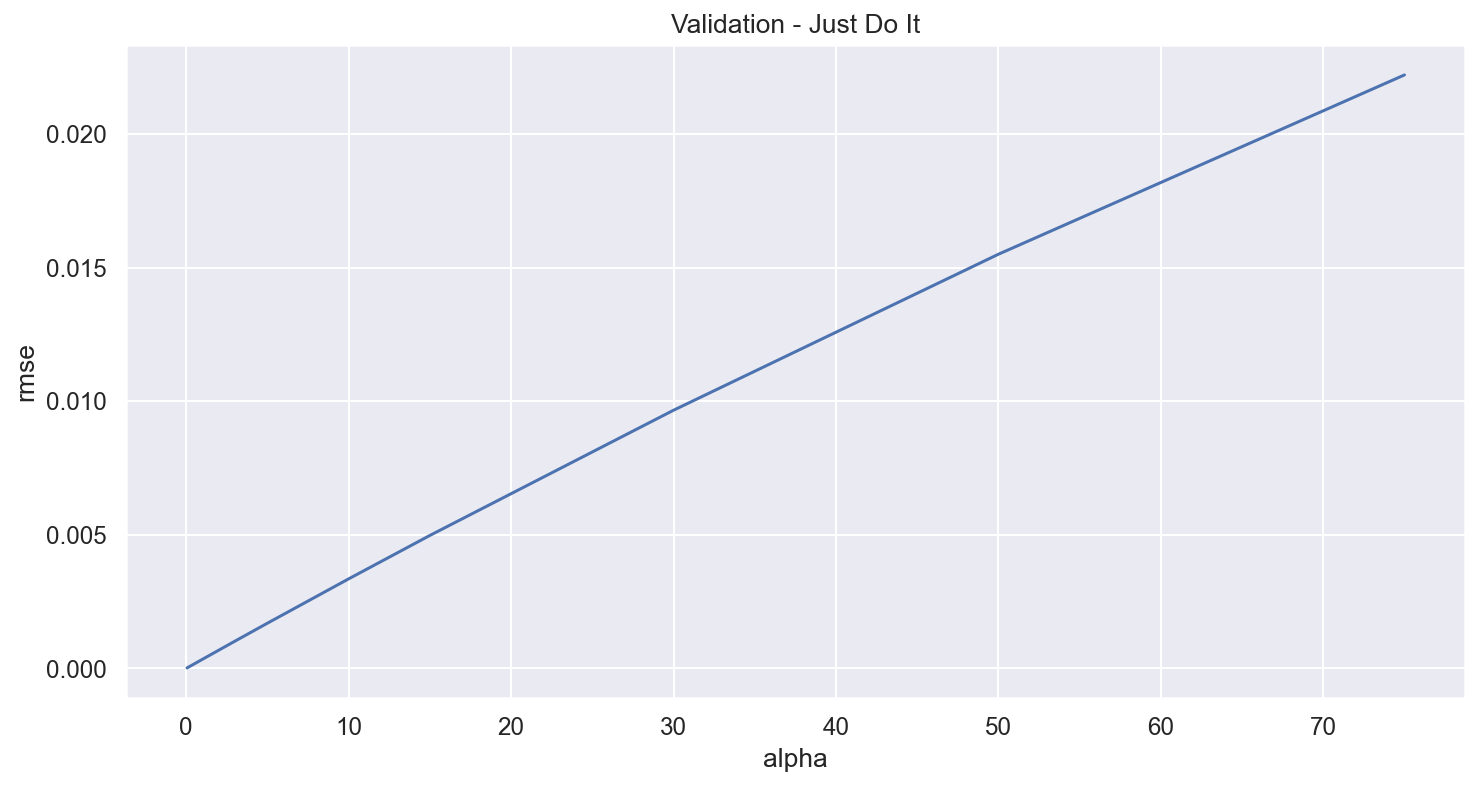

In [159]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [160]:
cv_ridge.min()

1.7103339985430653e-05

**Interpretation :**
- So for the Ridge regression we get a rmsle of about 0.127

### Lasso Regression 

In [161]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [162]:
rmse_cv(model_lasso).mean()

0.002725989242193314

**Interpretations : **
- The lasso performs even better so we'll just use this one to predict on the test set. Another neat thing about the Lasso is that it does feature selection for you - setting coefficients of features it deems unimportant to zero. 
- Let's take a look at the coefficients:

In [163]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [164]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 9 variables


**Interpretations :**
- Note here all the 6 feature variables are the correct ones as all the multicollinearity had been removed during the model building of Multi Linear Regression. 